In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
!pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [3]:
#LOADING DATA
data = pd.read_csv('loan.csv',low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#UNDERSTANDING DATA
# GETTING THE NUMBER OF ROWS AND COLUMNS
# check the datatype of loan data
print(data.shape)
print(data.info())
print(data.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [5]:
#Lower rows of data frame
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for duplicate rows in dataset based on id column

print(data.duplicated( subset=None, keep='first').count())
duplicate_rows=data[data.duplicated(['id'])]
duplicate_rows
# There are no duplicate rows in loan dataset

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [7]:
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(data.isnull().all(axis=1).sum())
# Observation: There are no empty rows in whole dataset.

# sum it up to check how many columns have all missing values
print('Number of empty Columns:')
print(data.isnull().all(axis=0).sum())
# Observation: There are 54 columns have all missing values.

Number of empty Rows:
0
Number of empty Columns:
54


In [8]:
# Data cleaning
# Lets find Which columns have all null values

data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# Data cleaning
# Lets check columns with null values
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [10]:
#Finding percentage of null or missing values
# Here data.index is the index of rows from 0 to 39717

null_percentage = round(100*(data.isnull().sum()/len(data.index)), 2)

#Printing columns which have more than 0% missing values
null_percentage[ null_percentage > 0 ]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [11]:
# Now here again there are columns  which shows that majority  of the values columns are having
# Null values i.e let's keep threshold of 32 from the above table and delete
# the columns with having NUll Values more than 32%
data.drop(null_percentage[ null_percentage > 32 ].index, axis=1, inplace=True)

In [12]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
#After deletion of the columns having null values of more than 32% the columns left are 53
data.shape

(39717, 53)

In [14]:
#Finding number of unique values in each vcolumn
data.nunique().sort_values().head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
dtype: int64

'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan' columns have only one unique value in all the rows, which will not give any usefull info for us. so, lets remove them.

In [15]:
#Dropping Columns with only one values.
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [16]:

data.shape

(39717, 44)

In [17]:
#Finding number of unique values, printing high unique valued columns so that we identify primary key
data.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
dtype: int64

emp_title, and title columns have text values which are more unique values.

In [18]:
data.drop(['emp_title', 'title'], axis=1, inplace=True)

id, url, and member_id having all unique values which means any one of these can be used as primary key. Les's remove url and member id columns.

In [19]:
data.drop(['member_id', 'url'], axis=1, inplace=True)


In [20]:
data.shape

(39717, 40)

total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed. recoveries, collection_recovery_fee columns are only valid for charged off loans. Will removed these columns.

In [21]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [22]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

Removing the the null valued rows in the above columns.

In [23]:
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [24]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

Loan Status Column has 3 distict values out of them we need only Fully Paid and Charged Off. So, we will remove the rows with Current values in loan status.

In [25]:
#Removing current loan status rows
data = data[data.loan_status != 'Current']

In [26]:
print("Post removal of CURRENT loans, count of distinct load_status are: ", data.loan_status.nunique())
print("")
print("Count of Rows:", data.groupby(['loan_status'])['loan_status'].count())

Post removal of CURRENT loans, count of distinct load_status are:  2

Count of Rows: loan_status
Charged Off     5266
Fully Paid     31534
Name: loan_status, dtype: int64


In [27]:
#Checking unique values for term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

There is empty space at the start of values. Let's remove it.

In [28]:

#Stripping empty space in values in term
data['term'] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [29]:
# Finding datatype in all coulmns
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

columns like int_rate and revol_util have '%' symbol values and with data type of object. Let's remove % at the end and convert to float

"term" column indicates numeric value but, it has text associated with it. Need to remove the text "months" from this "term" column to make it ready for arithmatic analysis.

emp_length column also has text associated with a number, so, need to alter to get its values as numeric.

In [30]:
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)

In [31]:
#remove "months" word from term column
data["term"] = data["term"].str.replace("months", "")
data["term"].astype(int)

0        36
1        60
2        36
3        36
5        36
         ..
39562    36
39573    36
39623    36
39666    36
39680    36
Name: term, Length: 36800, dtype: int64

In [32]:
# Need to convert few of the columns such as 'issue_d' and 'earliest_cr_line' to date type

# Convert the issue_d (issue date) column to datetime format with the specified format '%b-%y' (MMM-YY)
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

#### Standardising values

In [33]:
# update emp_length column with continuous values as int
# where (< 1 year) is assumed as 0 and 10+ years is assumed as 10 and rest are stored as their magnitude
# data["emp_length"] = pd.to_numeric(data["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

##### Creating Derived columns

In [34]:
#issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)


Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.

In [45]:
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)

#### Removing outliers

In [118]:
#1: 
# As per the above, annual_inc's max value is 6000000 where 75% quantile value is 83000, is significant variance of its mean.
# suggest to remomve outliers from annual_inc column - 99 to 100%
annual_inc_quantile = data["annual_inc"].quantile(0.99)
loan = data[data["annual_inc"] < annual_inc_quantile]


#2:
# Similarly, open_acc's maximum value is 29 where 75% quantile value is 12, and is beyond 3 times the mean
# suggest to remomve outliers from open_acc i.e. 99.9 to 100%
open_acc_quantile = loan["open_acc"].quantile(0.999)
loan = loan[loan["open_acc"] < open_acc_quantile]

#3
# Now total_acc's maximum value is 49.0 where 75% quantile value is 28.0, and is almost thrice the mean
# suggest to remomve outliers from total_acc i.e. 98 to 100%
total_acc_quantile = loan["total_acc"].quantile(0.98)
loan = loan[loan["total_acc"] < total_acc_quantile]


# Now pub_rec's maximum value is 1 where 75% quantile value is 0, and is significantly higher than its mean
# suggest to remomve outliers from pub_rec i.e. 99.5 to 100%
pub_rec_quantile = loan["pub_rec"].quantile(0.995)
loan = loan[loan["pub_rec"] <= pub_rec_quantile]


##### Creating Categorical derived column in the form of Bins (Binning)

In [159]:
# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
loan['annual_inc_cats'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
loan['int_rate_cats'] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

## Univariate Analysis

### Quantitative Variables

#### Loan amount

/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/1341822710.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.loan_amnt, rug=True)


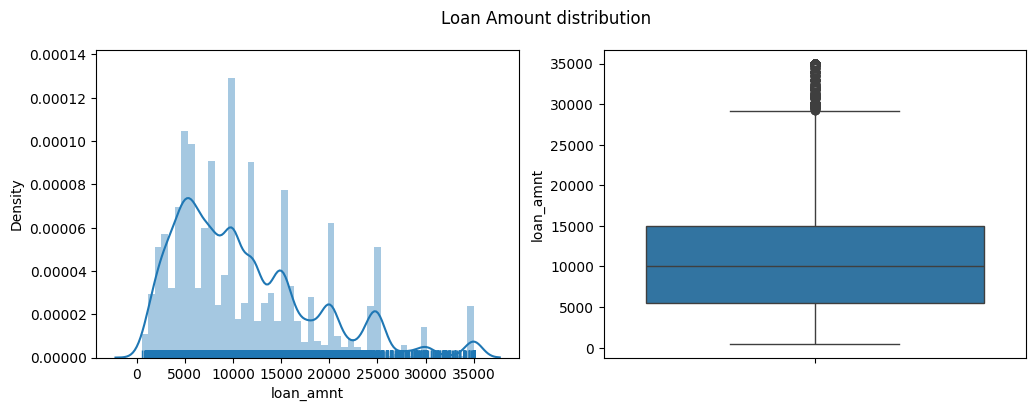

In [36]:

#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [37]:
#Stats of laon amount
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      22000.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

 **Observations:**
 
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

#### funded_amnt:


/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/677666992.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.funded_amnt)


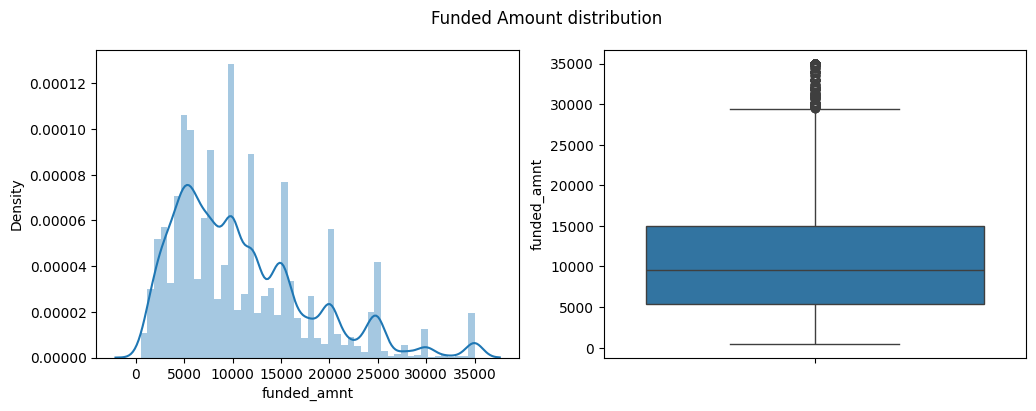

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [41]:

# Basic statistics with .describe() -Quantitative Variables
data.funded_amnt.describe()

count    36800.000000
mean     10880.794837
std       7109.157574
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

**Observations:**

Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.



#### Approved Loan Amount Ratio

/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/1519183886.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.approved_loan_amnt_ratio)


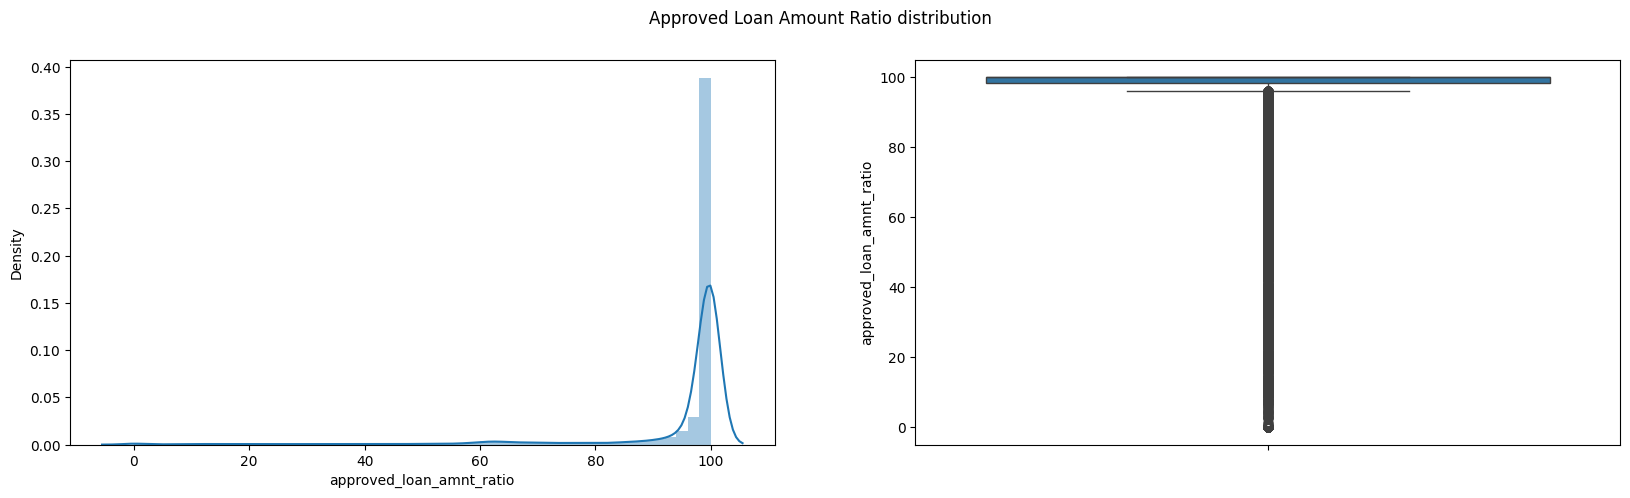

In [47]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

**Observations:** 70% of Borrowers got 100% loan amount from investors.

#### Interest Rate

/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/573582854.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['int_rate'],rug = True)


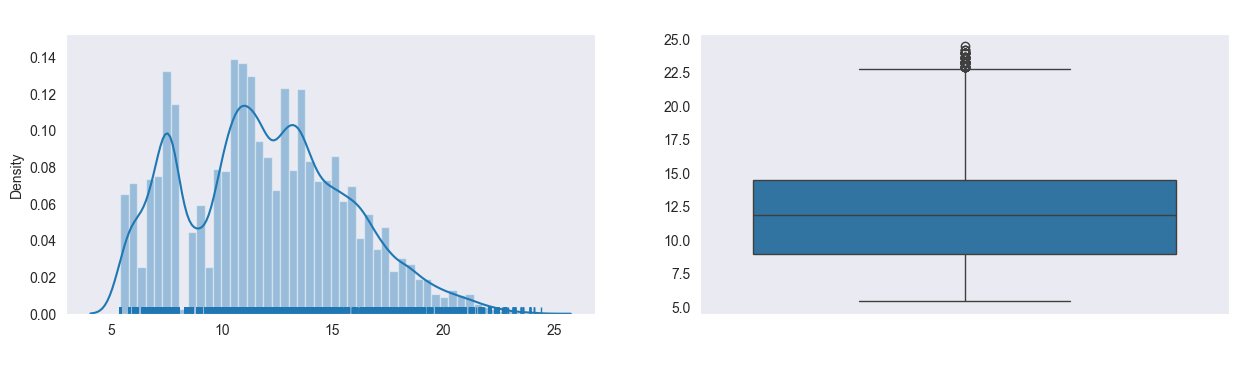

In [53]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=data['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

**Observations:**

Plots show that most of the Interest Rates on loans are in range of 10% - 15%

Some people took loan at higher rates of interest i.e., 22.5%

#### Annual Income

/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/3982344029.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(loan['annual_inc'],rug = True)


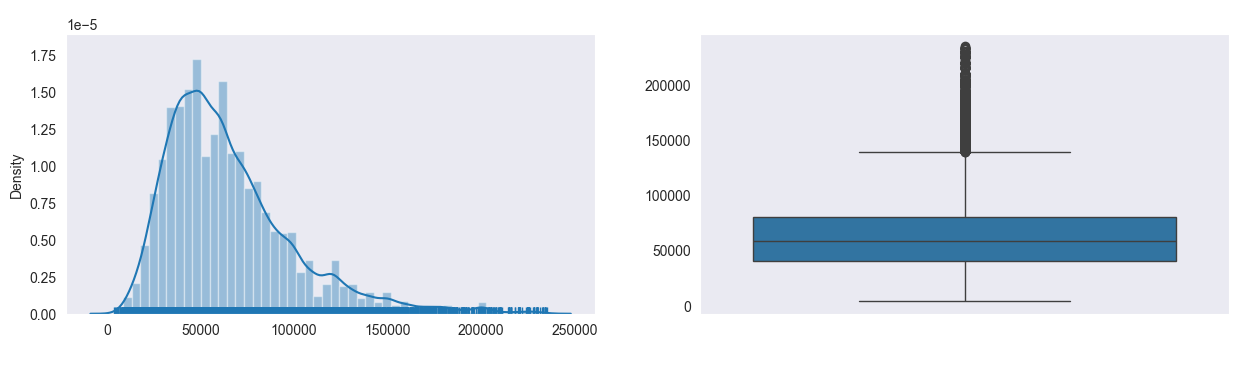

In [55]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()


**Observations :**

Plots show that most of the borrower's Annual incomes are in range of 40000- 80000

### Unordered Categorical variables

#####  Unordered Categorical Variables - Loan Status

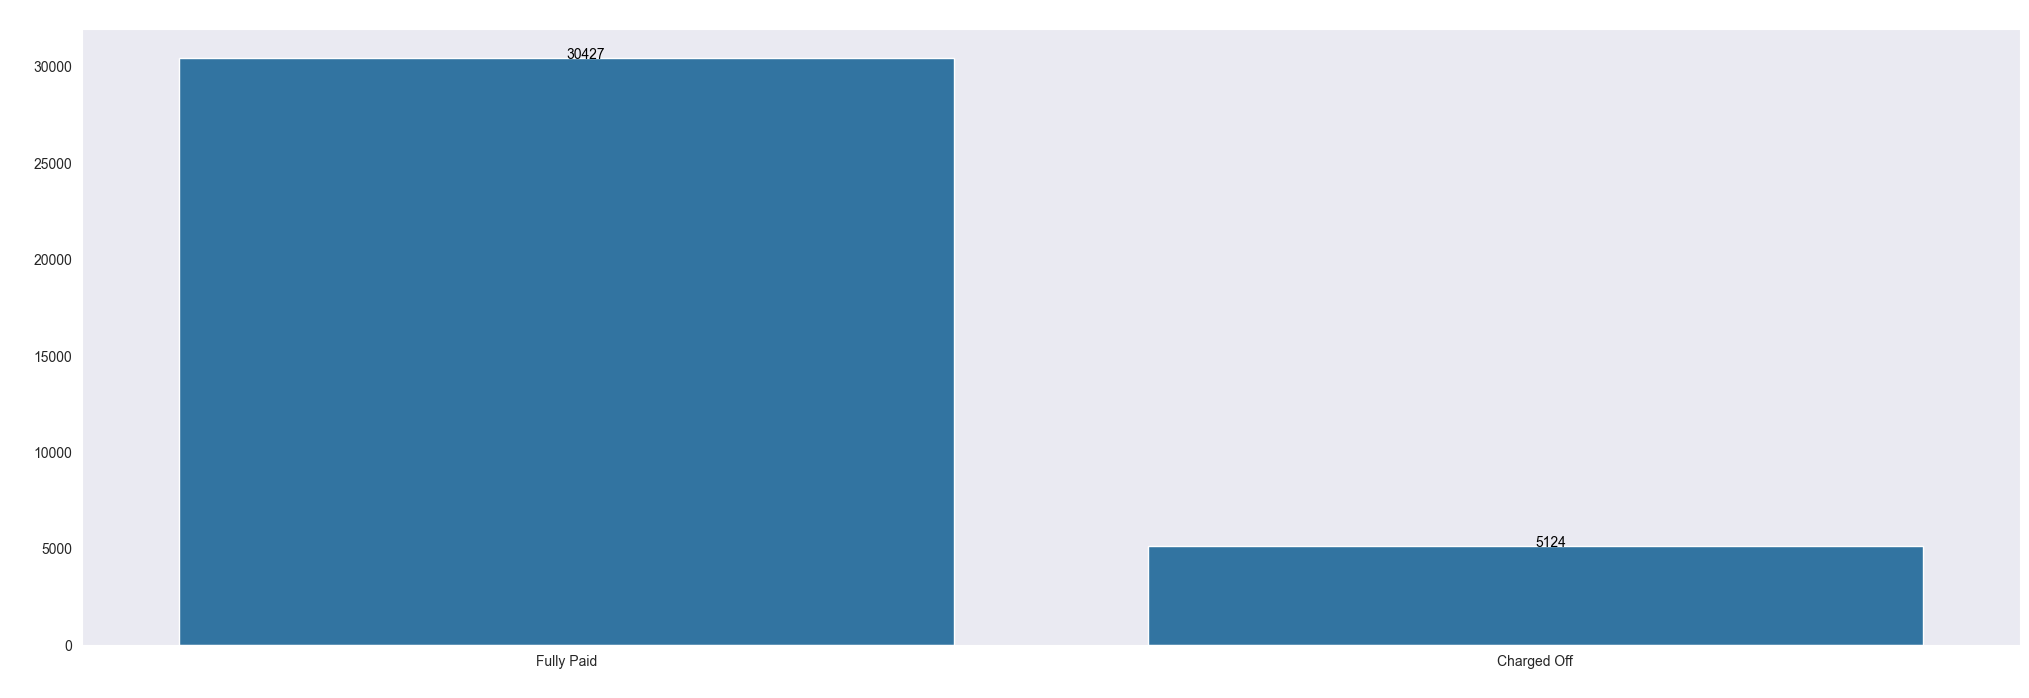

In [62]:
plt.figure(figsize=(25,8))
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan)
ax.set_title('Loan Status',fontsize=10,color='w')
ax.set_xlabel('Loan Status',fontsize=10,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=loan['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')


**Observations :**

plot shows that close to 14% loans were charged off out of total loan issued.

#####  Unordered Categorical Variables - pub_rec_bankruptcies

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

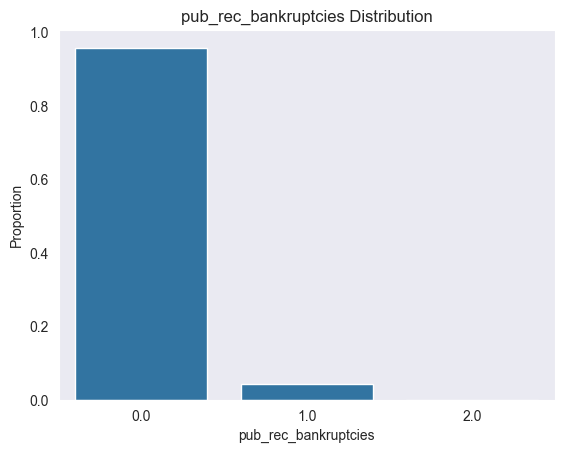

In [63]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


**Observations :**

99% people have not gone bankrupt.

#####  Unordered Categorical Variables - Home Ownership


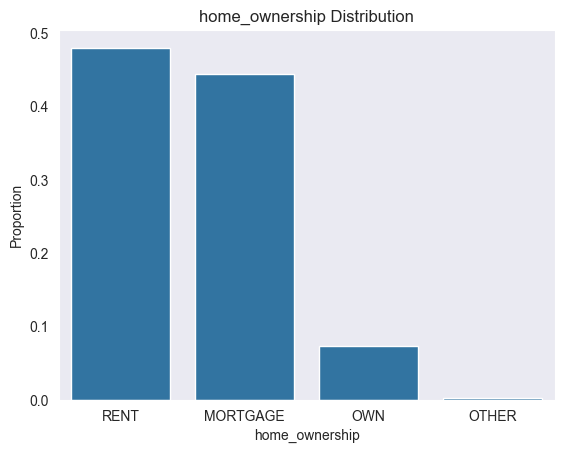

In [64]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()


**Observations :**

The loan borrowers are mostly having rented and mortgage houses.

#####  Unordered Categorical Variables - Verification status



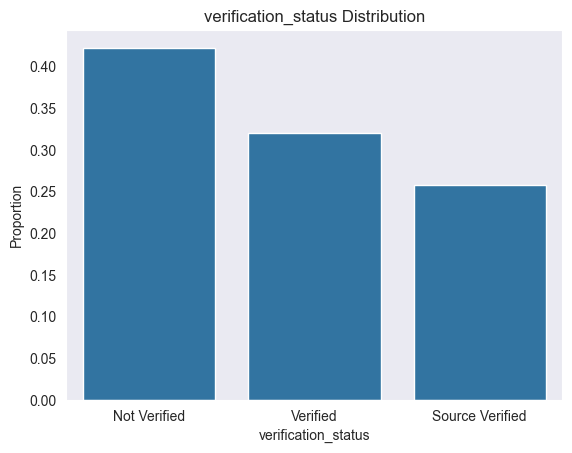

In [65]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()


**Observations :**

Majority of loans were given without verification of applicants income.

#####  Unordered Categorical Variables - Purpose



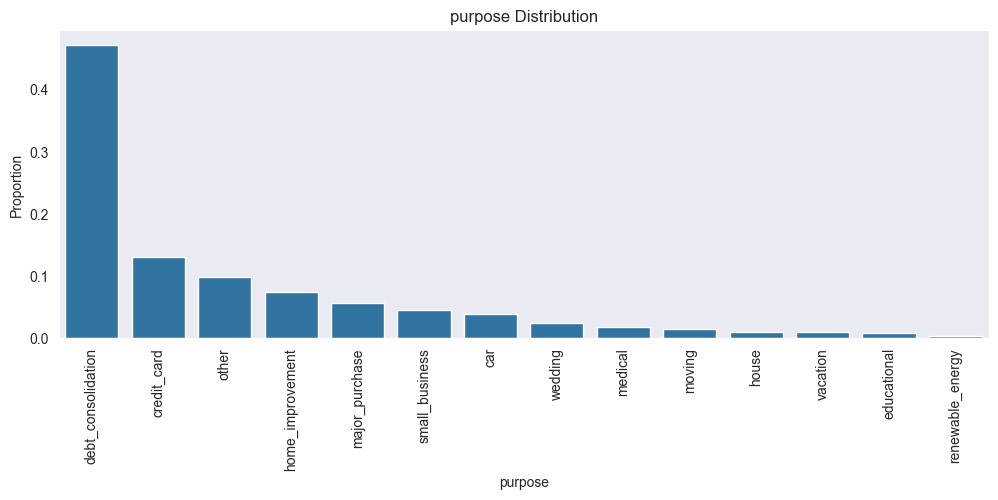

In [66]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations :**

Looks line more number of people took loan for debt consolidation and a very few people took for renewable energy

### Ordered Categorical variables

#####  Ordered Categorical Variables - Loan issue Date( year, month)



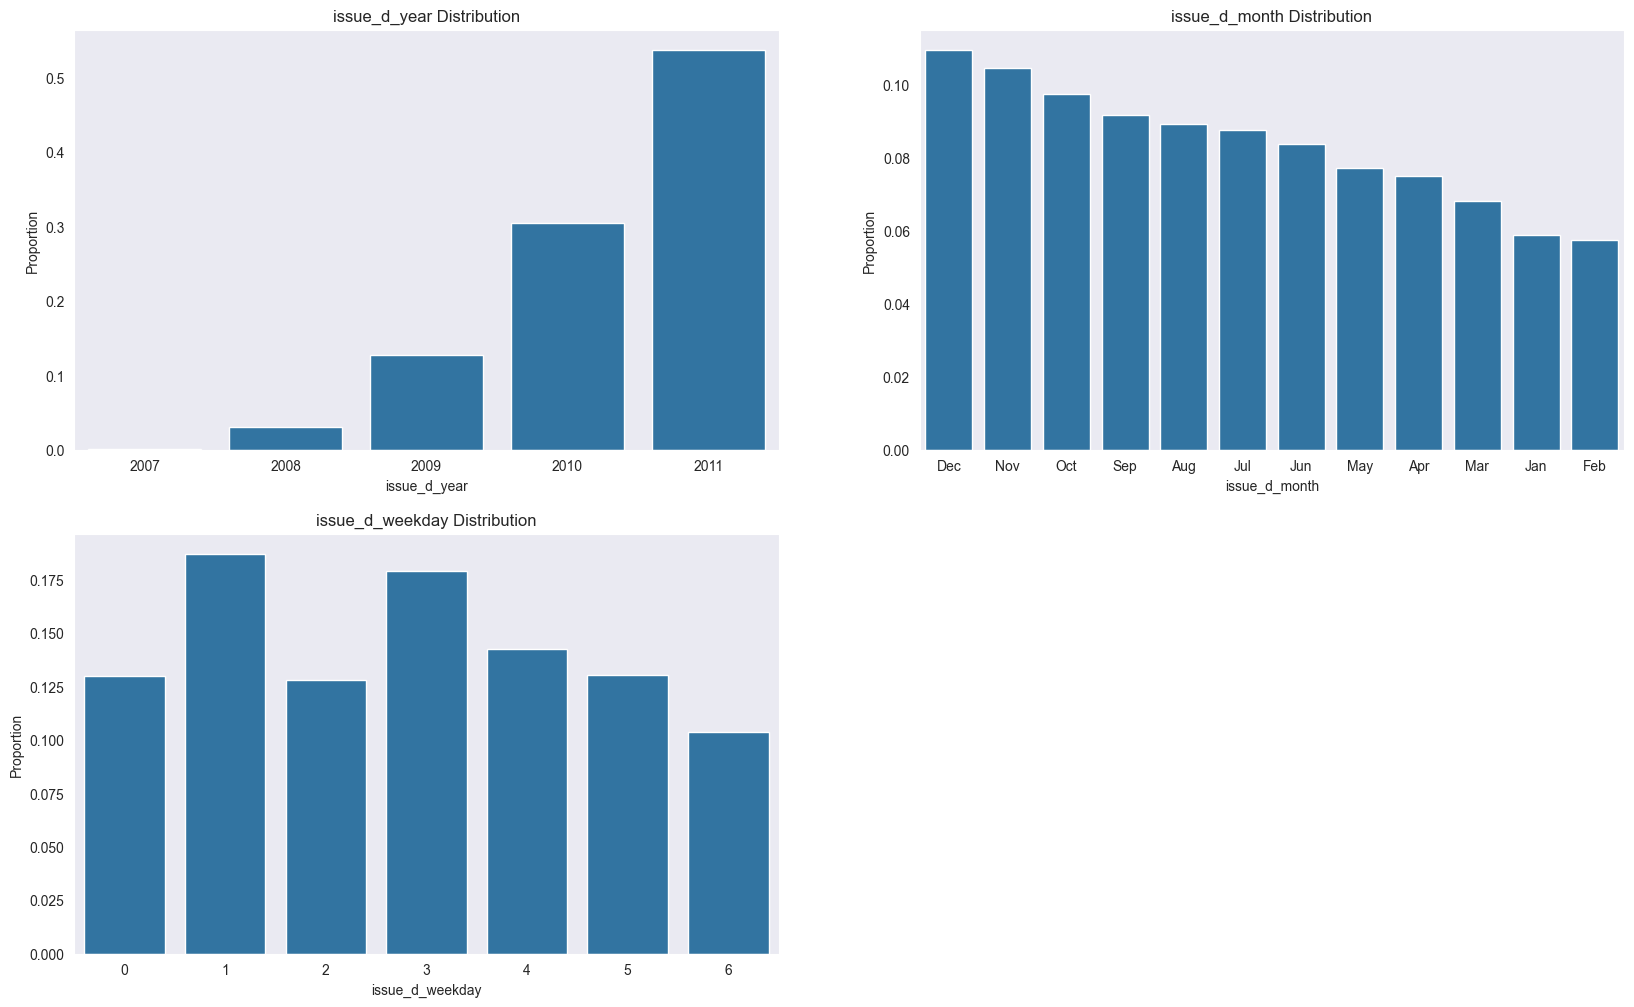

In [67]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

**Observations :**

The lending club(LC) has doubling loan issues every year.

There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec.

LC has issued more loans on tuesday and wednessday than other week days.

#####  Ordered Categorical Variables - Loan issue Term



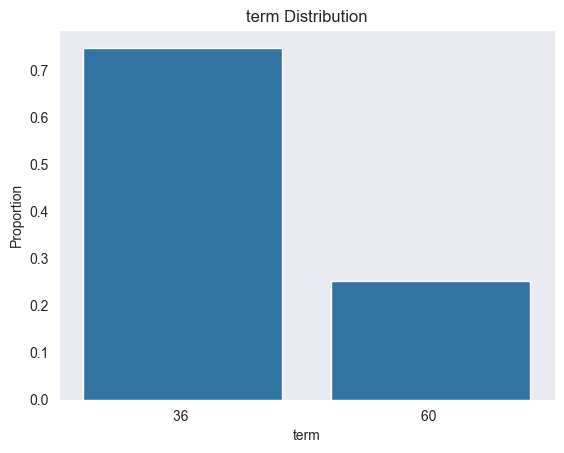

In [75]:
var = 'term'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations :**

Borrowers have taken 36 months tenure more than 60 months.

#####  Ordered Categorical Variables - Employment length



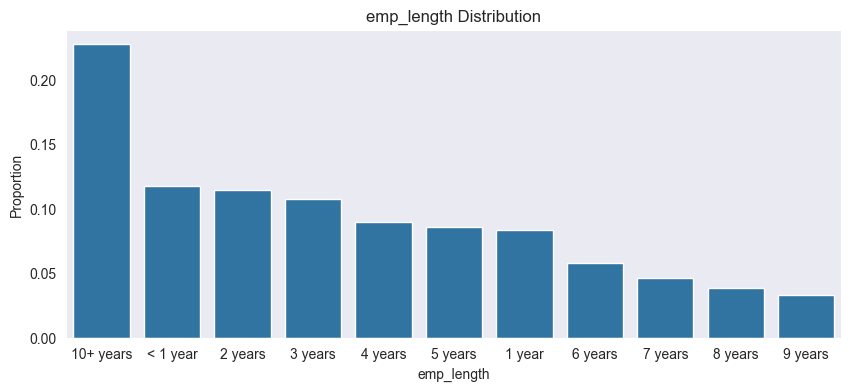

In [76]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations :**

Borrowers are mostly 10+ years emploment length.

#####  Ordered Categorical Variables - Grade



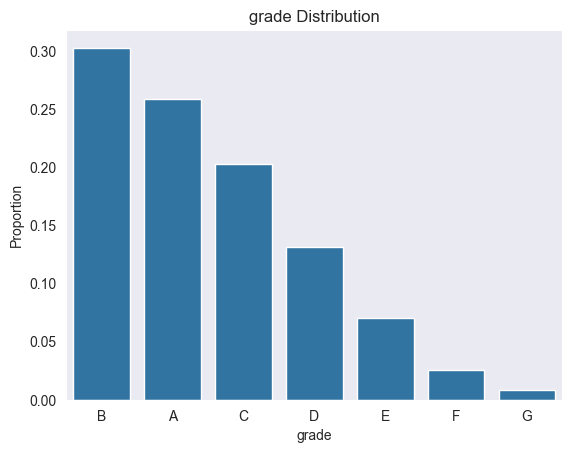

In [78]:
var = 'grade'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations :**

Most borrowers fall under A and B grades then other grades

### Segmented Univariate Analysis

####  Segmented univariate Analysis - Loan Amount



#####  Loan Amount vs Grade



<Axes: title={'center': 'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

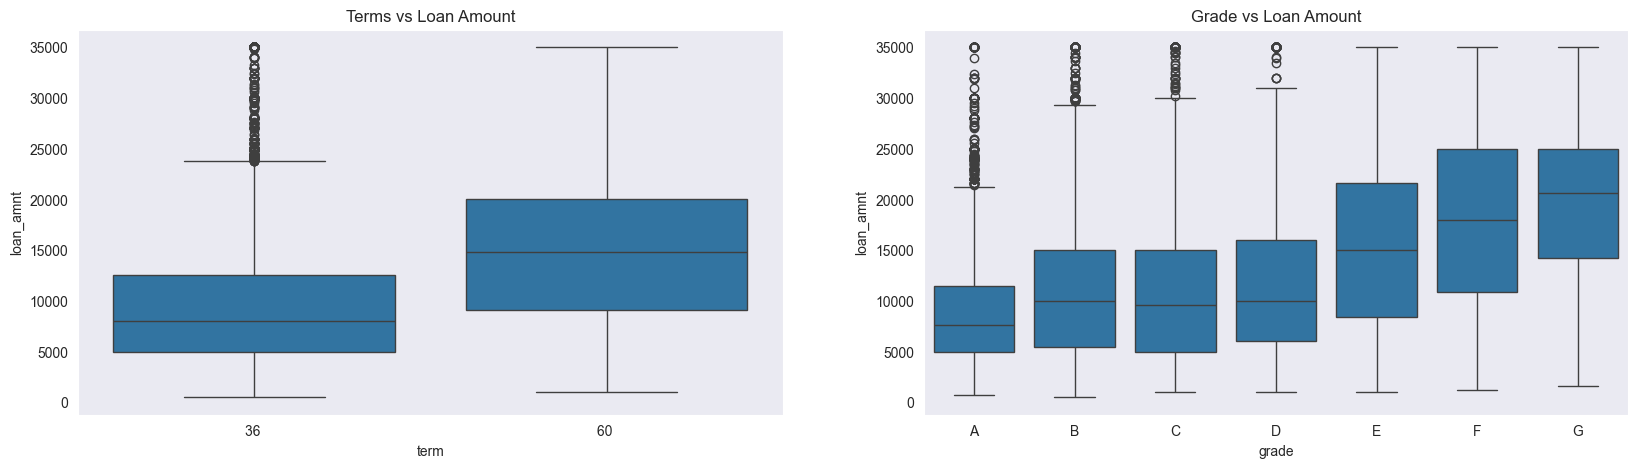

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

**Observations :**

Higher amount loans have high tenure i.e, 60 months.

Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

#####  (home_ownership vs Loan Amount) and (verification_status vs Loan Amount)



<Axes: title={'center': 'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

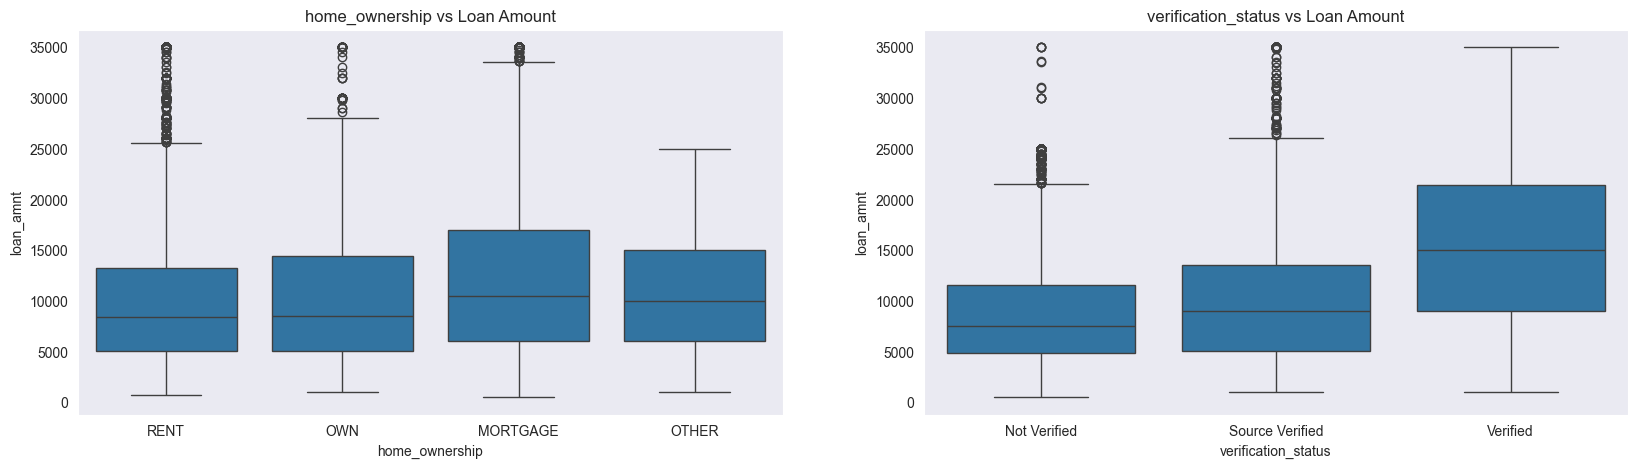

In [81]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

**Observations :**

more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.
And most of borrowers are verified for borrowing loan >9k

#####  loan_status vs Loan Amount



Text(0.5, 1.0, 'loan_status vs Loan Amount')

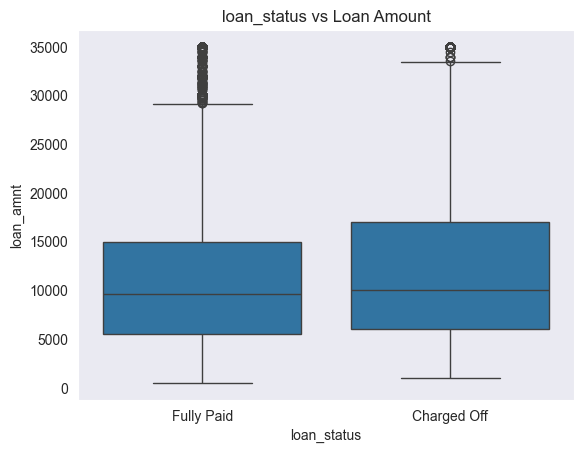

In [82]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

**Observations :**

Charged Off loans have higher amounts than Fully Paid ones.

#####  purpose vs Loan Amount



Text(0.5, 1.0, 'purpose vs Loan Amount')

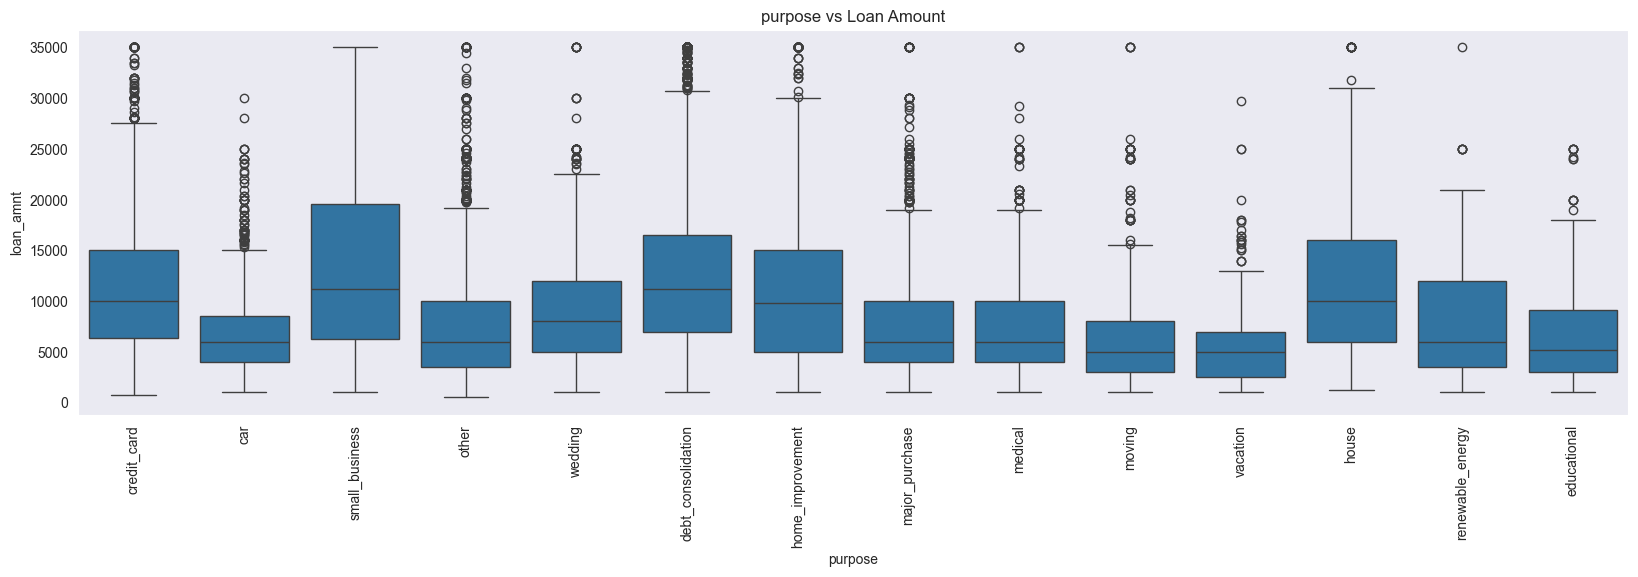

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

**Observations :**

More loan amount is from Small bussiness followed by debt consolidation.

#####  emp_length vs Loan Amount



Text(0.5, 1.0, 'emp_length vs Loan Amount')

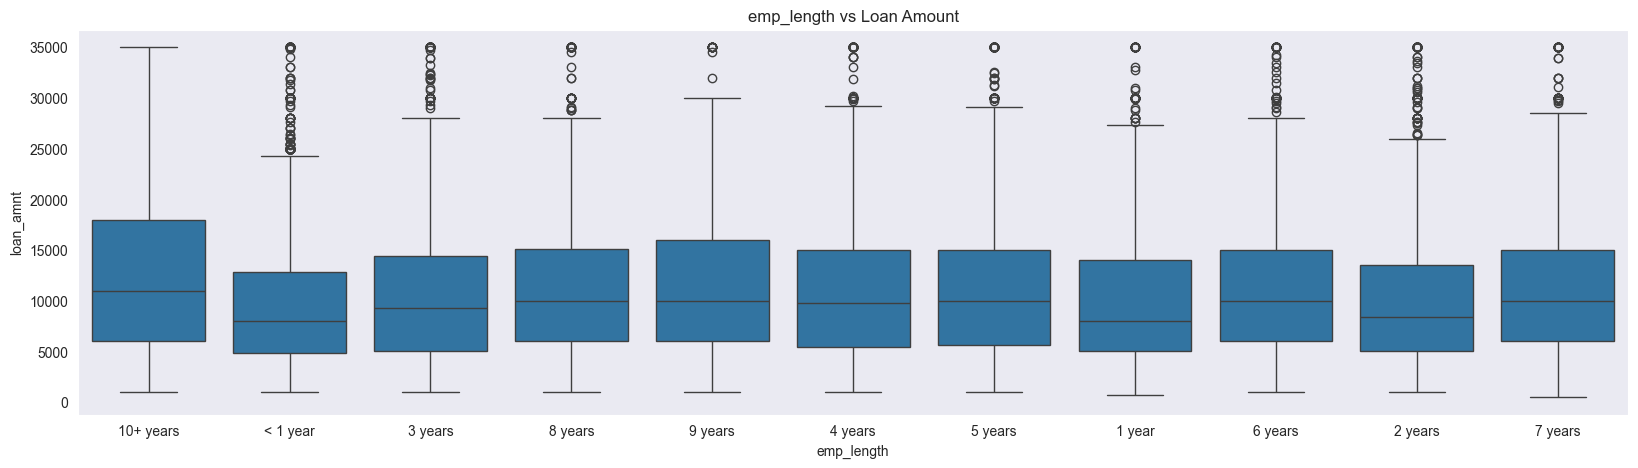

In [84]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

**Observations :**

more borrowers are from 10+ years and least is <1 year

####  Segmented univariate Analysis - funded amount



#####  (Terms vs funded amount) & (Grade vs funded amount)



<Axes: title={'center': 'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

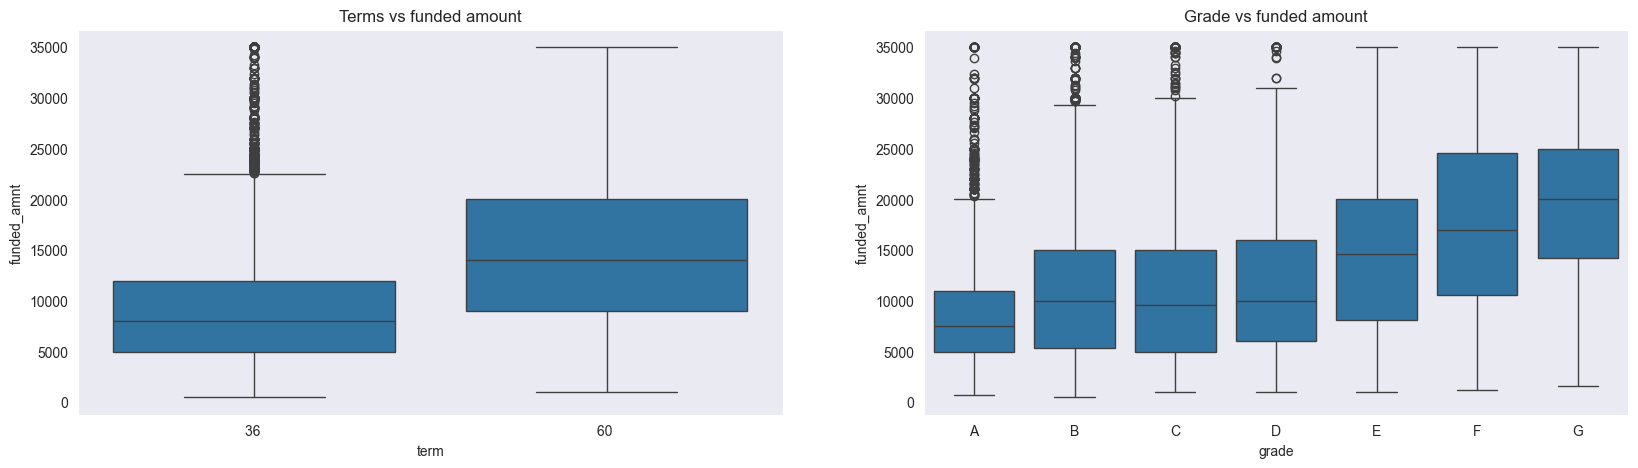

In [85]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)

#####  (emp_length vs funded amount)



Text(0.5, 1.0, 'emp_length vs funded amount')

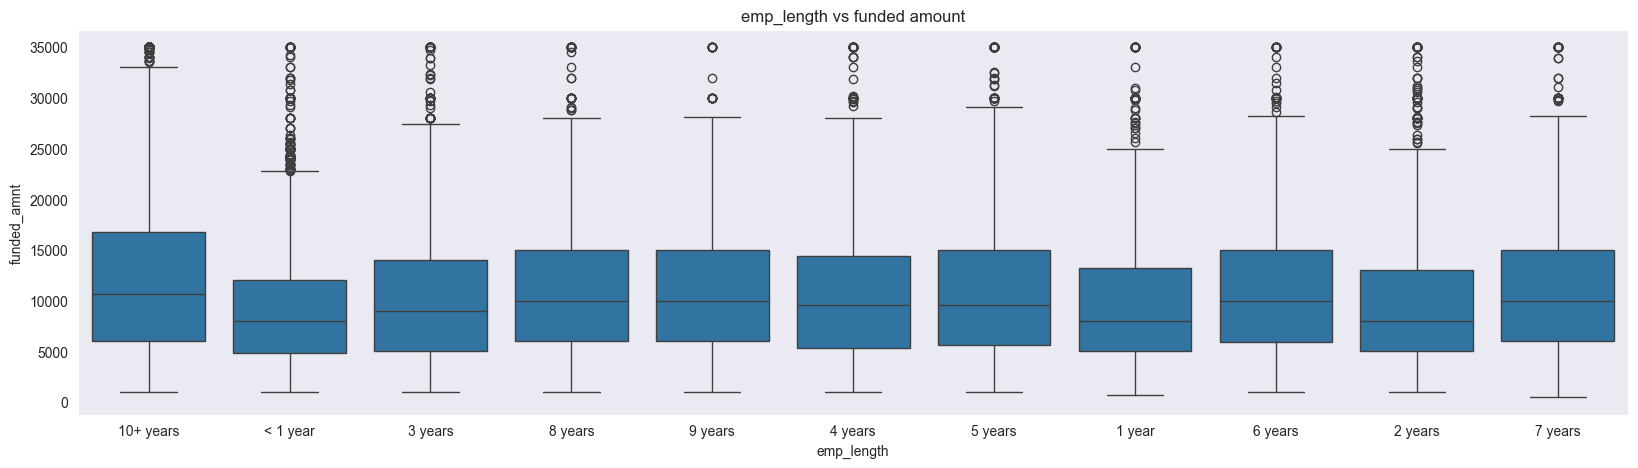

In [86]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')

#####  (loan_status vs Funded amnt)

Text(0.5, 1.0, 'loan_status vs Funded amnt')

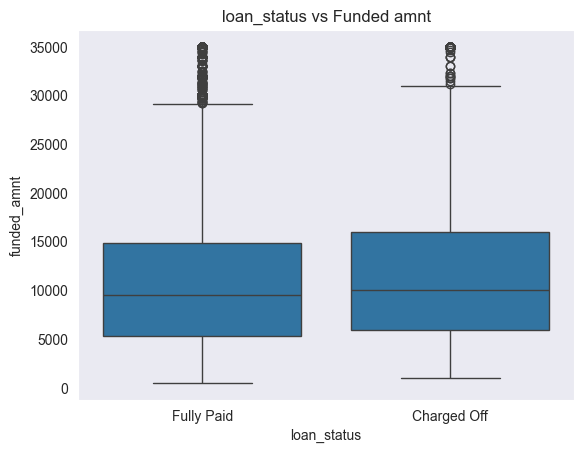

In [87]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')

**Observations :**

The Funded Amount has similar observations as Loan Amount.

####  Segmented univariate Analysis - Interest rate



#####  (Term vs Interest Rate) & (Grade vs Interest Rate)



<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

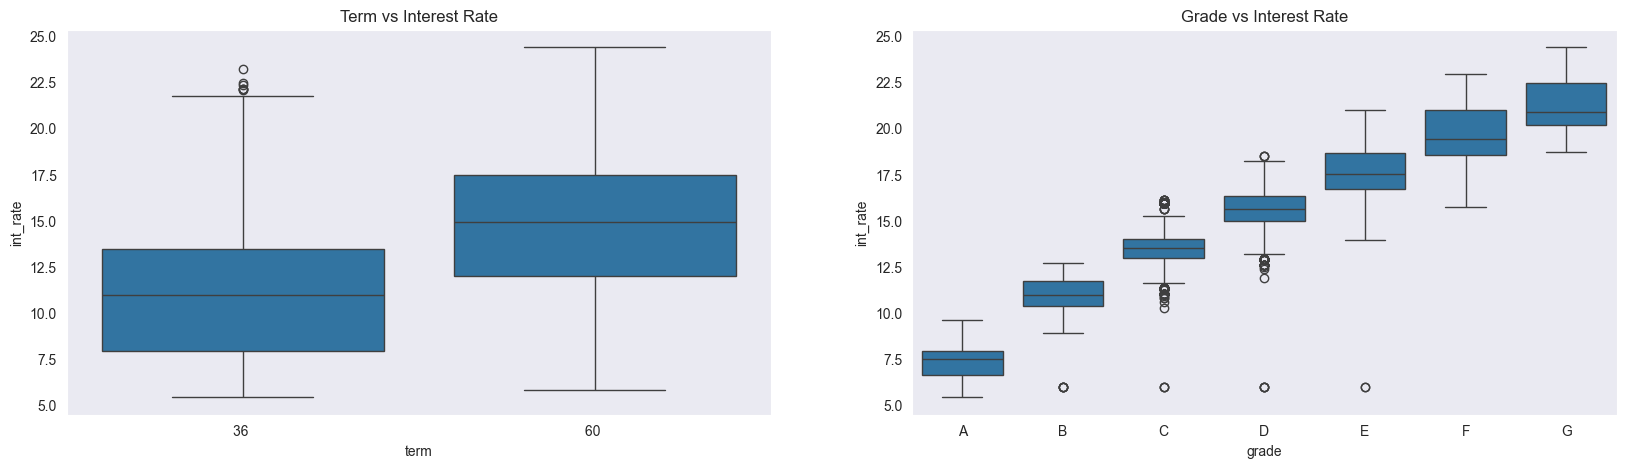

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

**Observations :**

The interest rates are higher for Higher tenure loans.

And Also Interest Rates are Higher as Grades are Lowering (A to G).

#####  (home_ownership vs Interest Rate) & (verification_status vs Interest Rate)



<Axes: title={'center': 'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

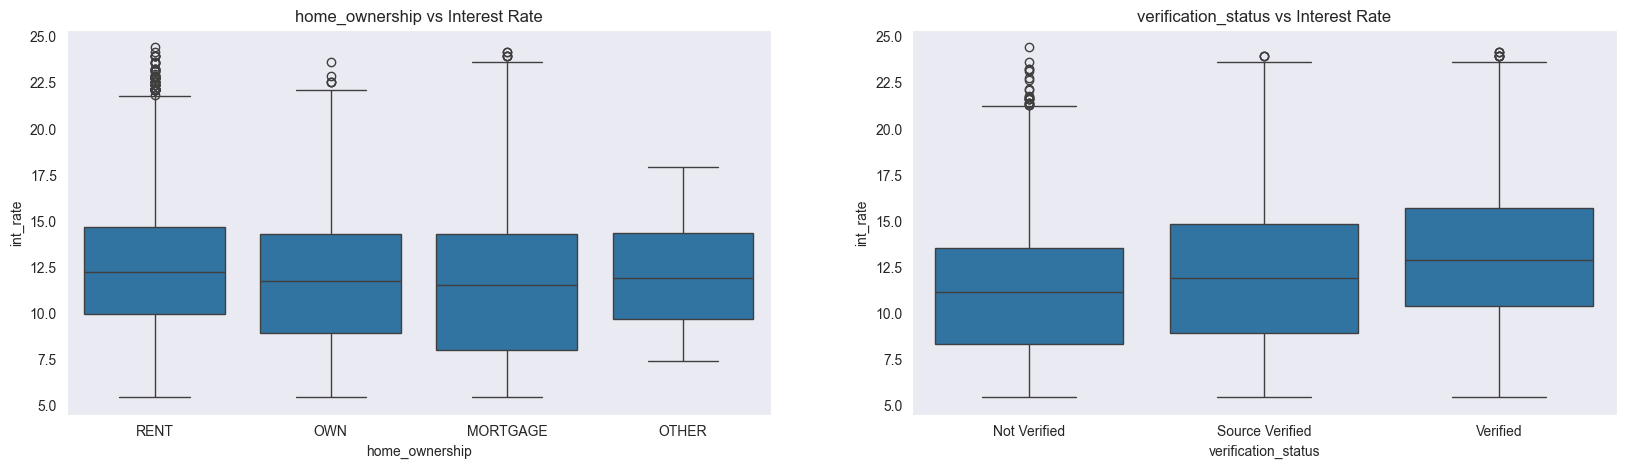

In [89]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.int_rate, order = verification_status_ord, data=data)

**Observations :**

Borrowers with Own and Mortgage got loans at lower interest rates as the homes can be used as collateral.
And The Non Verified Barrowers got loans at higher interest rates compared to Verified and Source Verified borrowers.

#####  (loan_status vs Interest Rate)



Text(0.5, 1.0, 'loan_status vs Interest Rate')

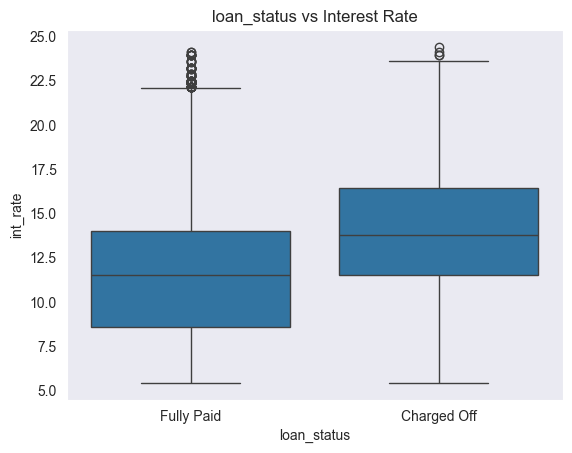

In [90]:
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

**Observations :**

This clearly tells us, greater the interest rate more is the chance of the borrower Defaulting the loan.

#####  (purpose vs Interest Rate) & (emp_length vs Interest Rate)



####  Segmented univariate Analysis - annual_inc



#####  (Grade vs annual income) & (purpose vs annual income)



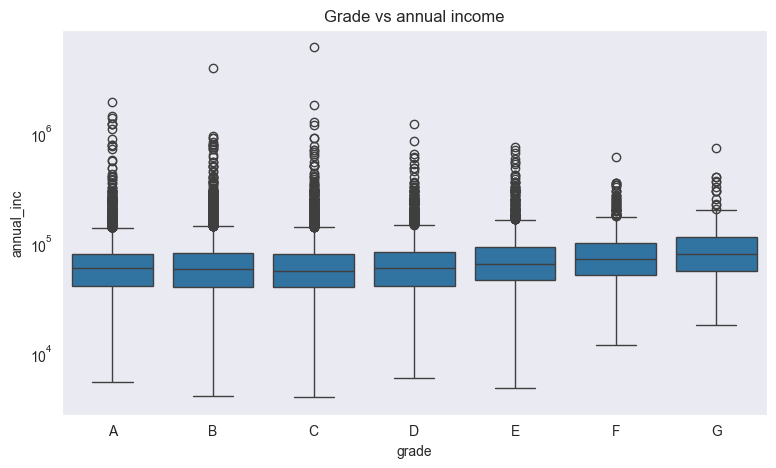

In [93]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')

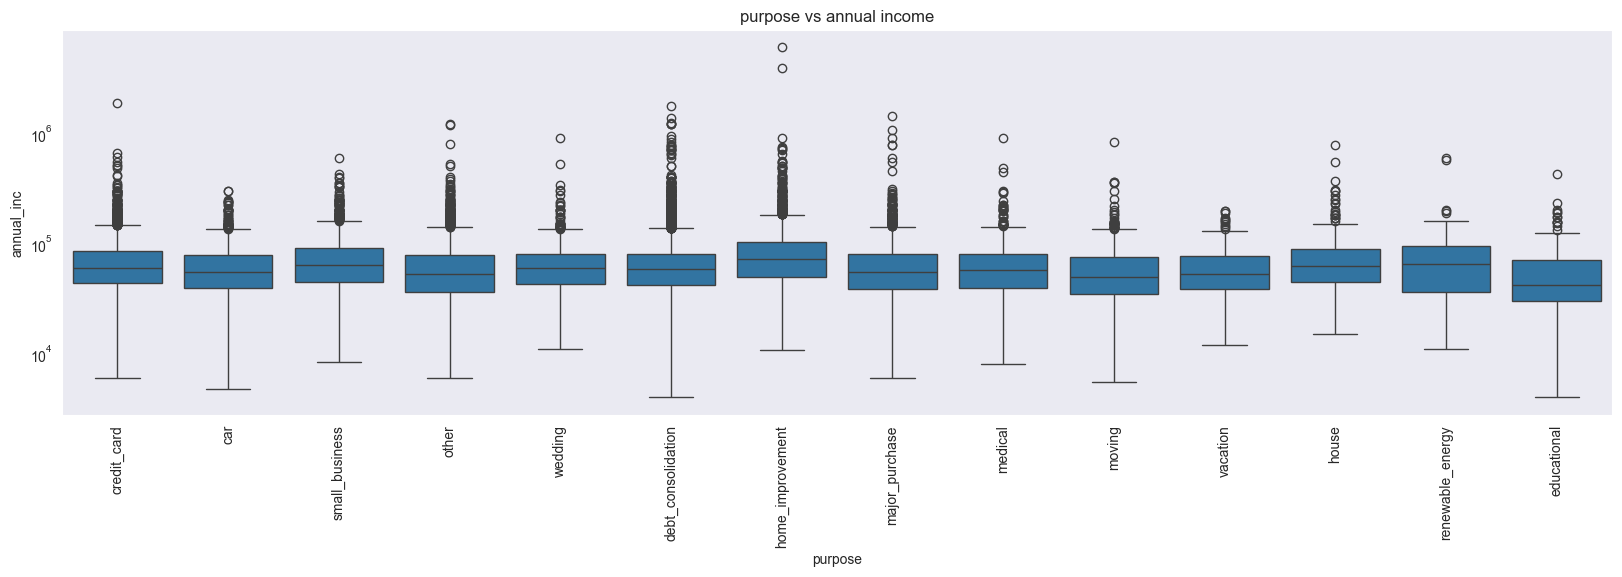

In [96]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

**Observations :**

Comparatively Annual income is higher for lower grades.

A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

#####  (loan_status vs annual income) & (Employee length vs Annual income)



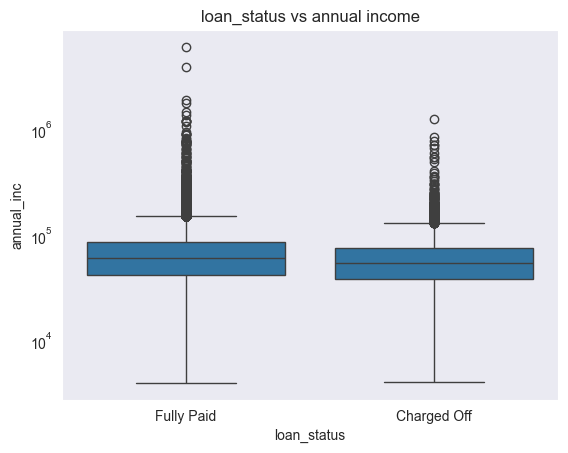

In [94]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

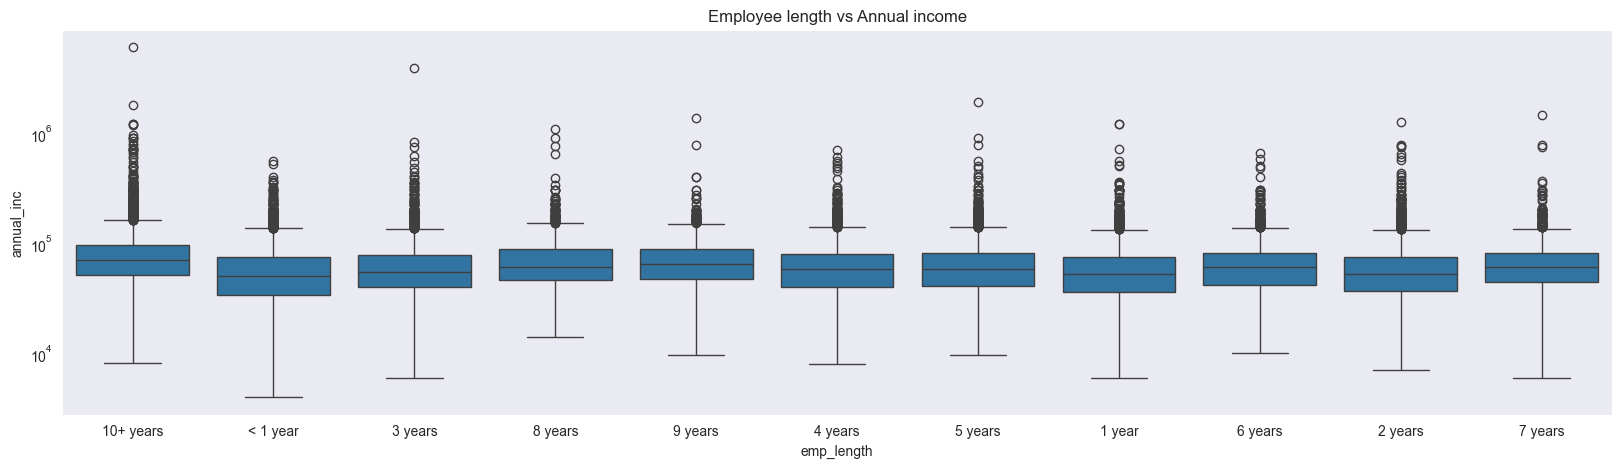

In [95]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

**Observations :**

Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.

The borrower's who has higer income have taken loans for 10+ years of duration.

####  Segmented univariate Analysis - dti ( debt to income ratio)



#####  (loan_status vs dti) & (purpose vs dti)



Text(0.5, 1.0, 'purpose vs dti')

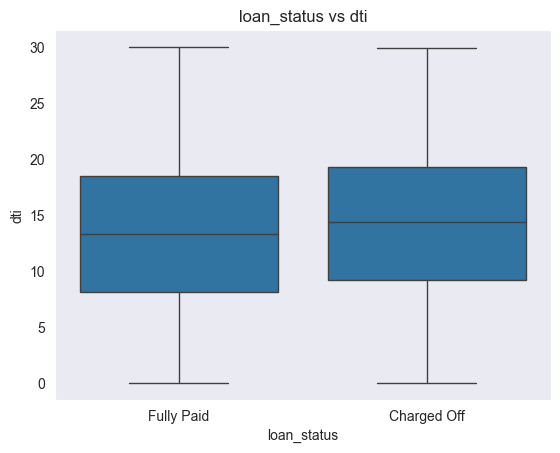

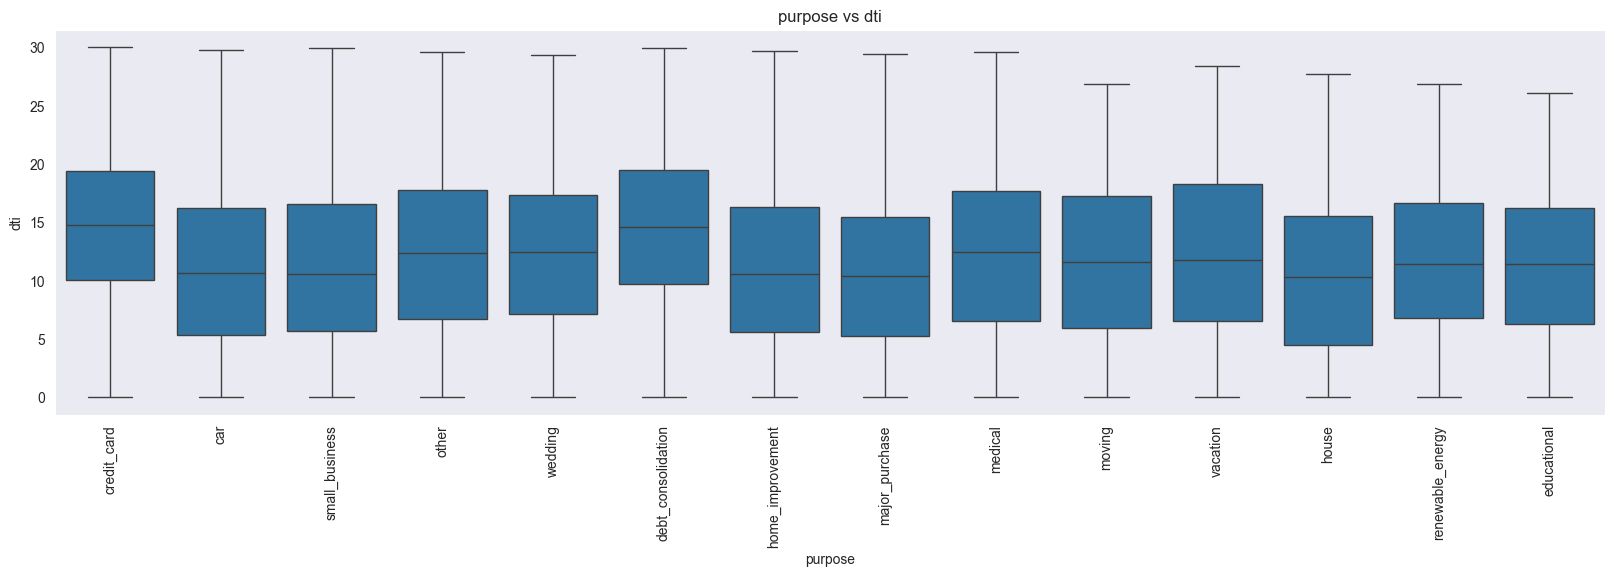

In [100]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')

plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

**Observations :**

Borrowers with high DTI has bit more probability to default

People who took loan for credit card and debt consolidation purpose has more DTI than other purposes.

#####  (Terms vs dti) & (home_ownership vs dti)



Text(0.5, 1.0, 'home_ownership vs dti')

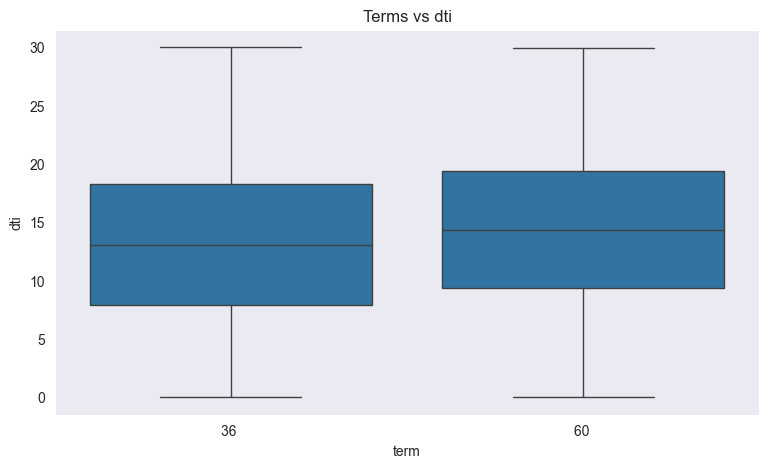

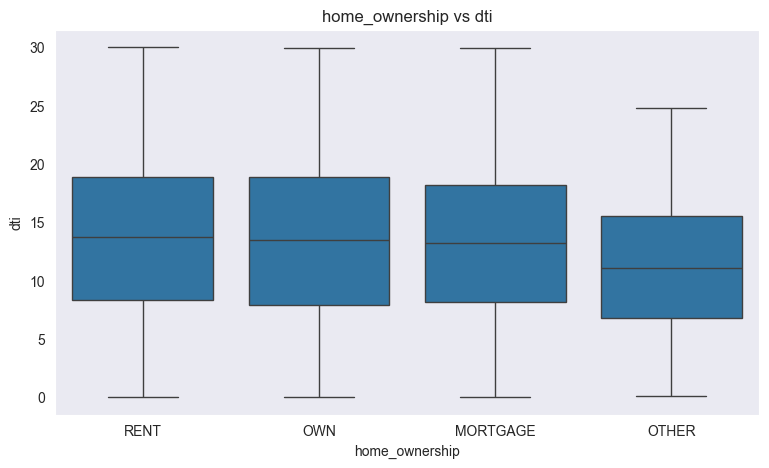

In [101]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')

**Observations :**

DTI is bit high for people who got more tenure i.e., 60 months.

People in Other home ownership has less DTI than others. This is may be bacause other people have mortgage and home loans.

## Bivariate Analysis

#### Bivariate Analysis - Term 

##### Term vs Loan Status

/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/4274992404.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Term vs Loan status')

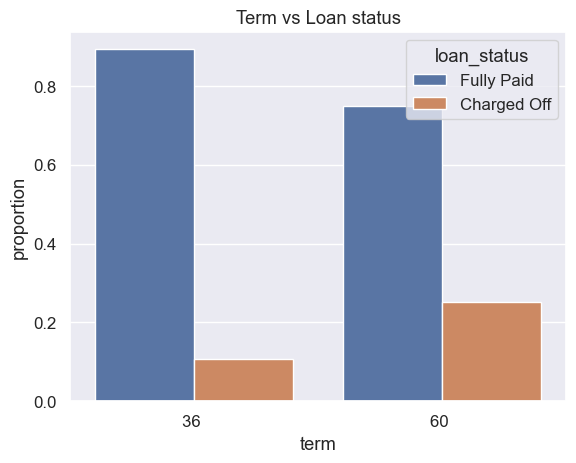

In [105]:
#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

**Observations:**

Looks like there are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

##### Term vs loan amount

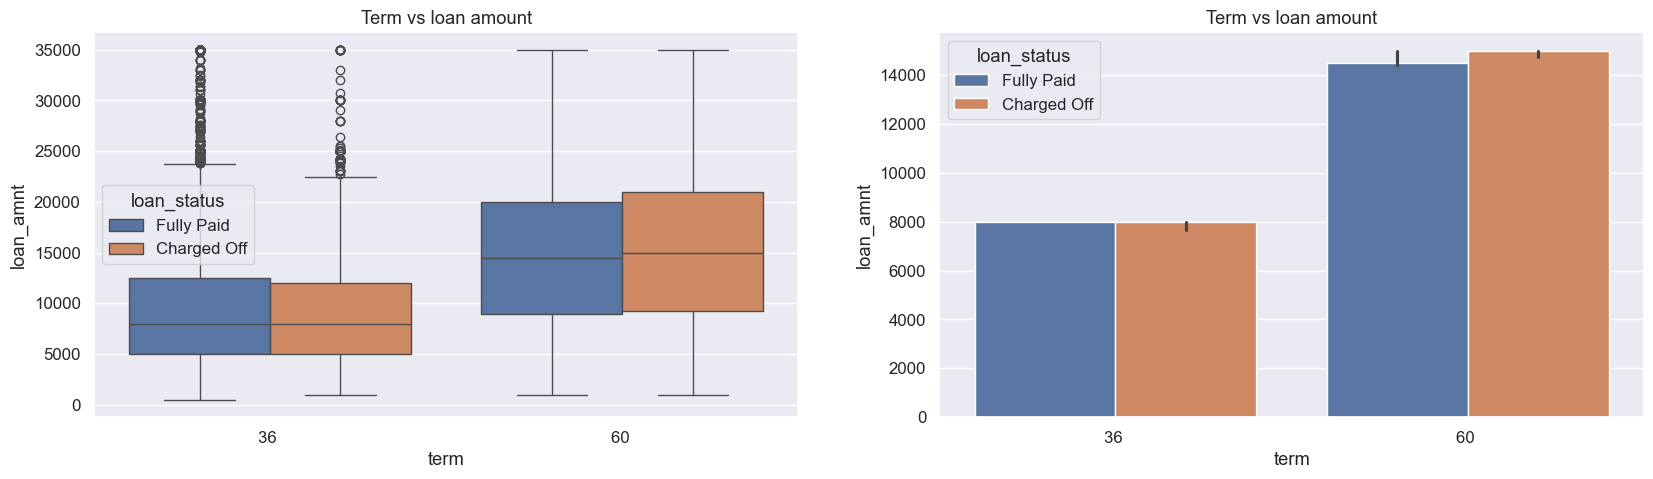

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations:**

Loan amount is not a decider for defaults in both 36 adn 60 months.
Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

##### Term vs Interest rate

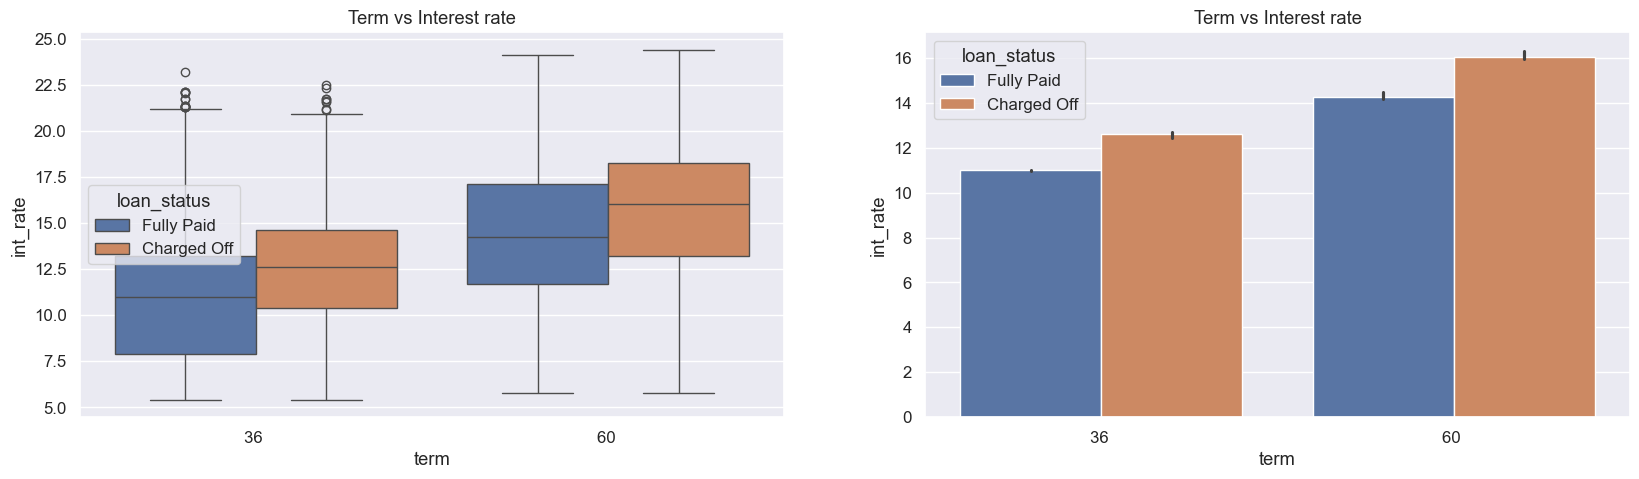

In [107]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

**Observations:**

For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

#### Bivariate Analysis  - Grade

##### Grade vs Loan status

In [108]:
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/2522014393.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

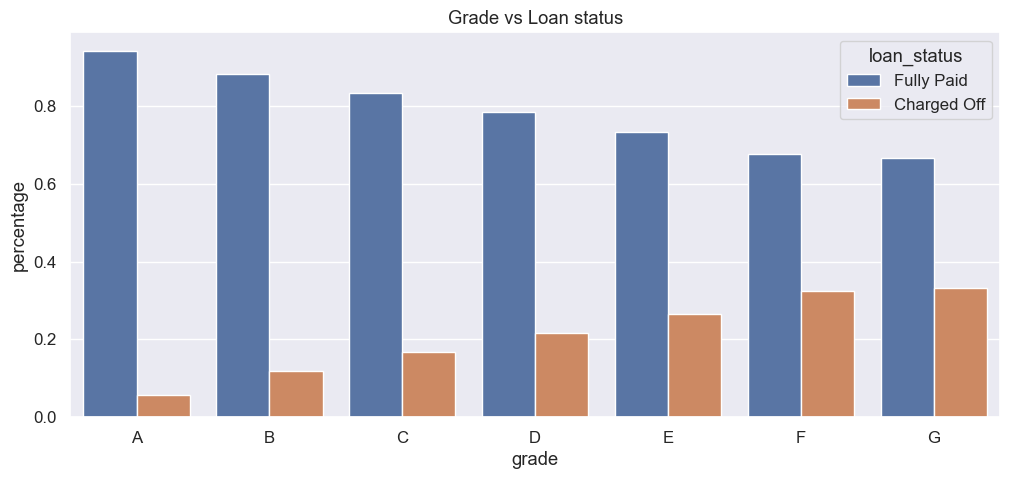

In [109]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

**Observations:**

The above graph clearly says the Charged off increases as grades decreases.

##### Grade vs Interest Rate

#### Bivariate Analysis - Annual_inc

In [122]:
inc_range_vs_loan = loan.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_cats,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,181,772,953,0.189927
1,20000-40000,1379,6492,7871,0.175200
2,40000-60000,1619,9041,10660,0.151876
3,60000-80000,956,6226,7182,0.133111
4,80000 +,989,7896,8885,0.111311


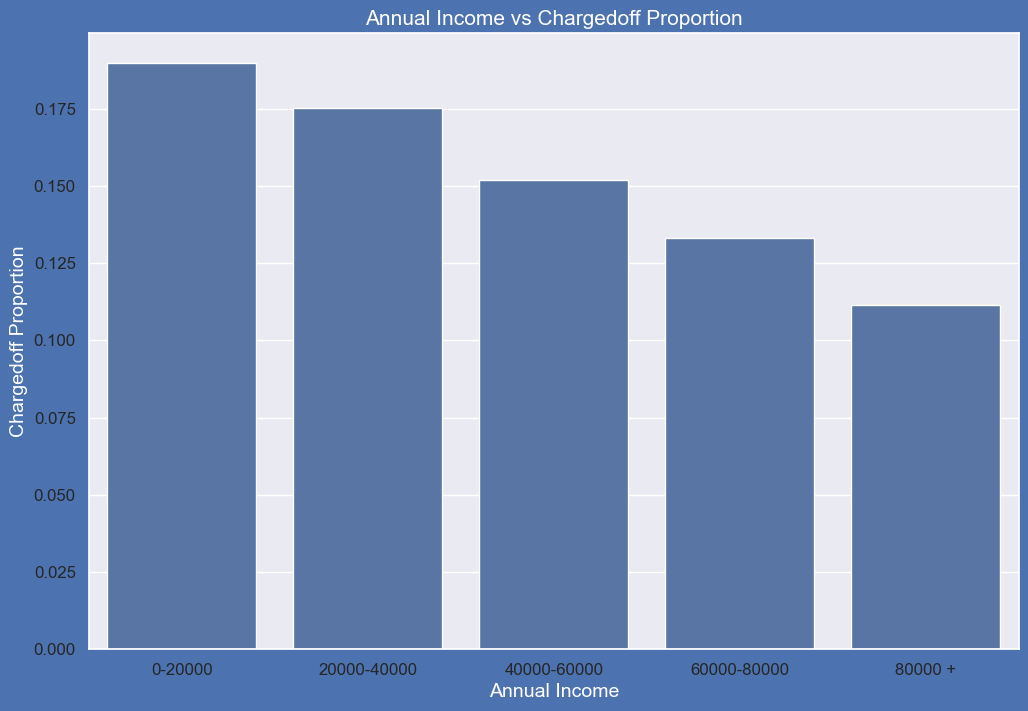

In [123]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

**Observations:**

* Income range 80000+  has less chances of charged off.
* Income range 0-20000 has high chances of charged off.
* Notice that with increase in annual income charged off proportion got decreased. 

#### Bivariate Analysis - Purpose

##### Purpose vs Chargedoff_Proportion

/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/230563519.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

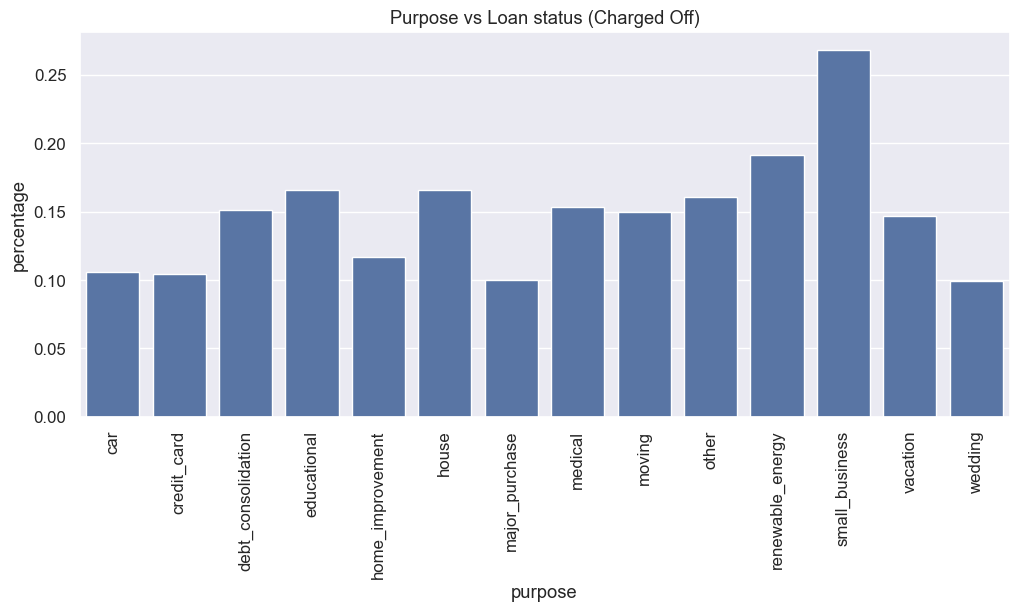

In [124]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

**Observations:**

Charged-off are higher for small_business comparitively. 

##### Purpose vs loan amount

<Figure size 640x480 with 0 Axes>

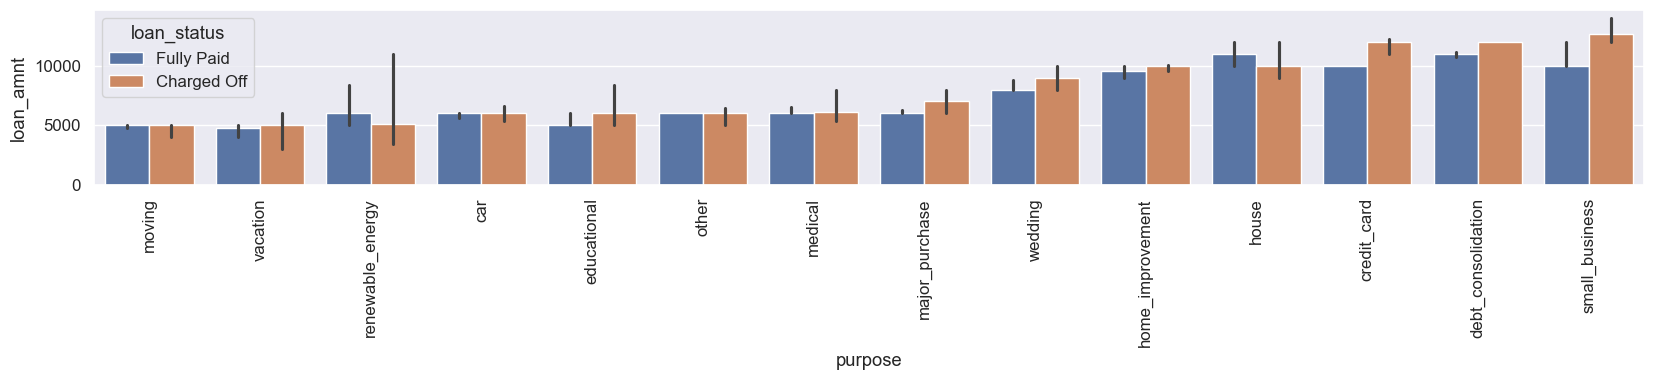

In [129]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)



plt.show()

**Observations:**

Small Business has more defaults when the loan amount is also high.

##### Purpose vs interest rate

<Figure size 640x480 with 0 Axes>

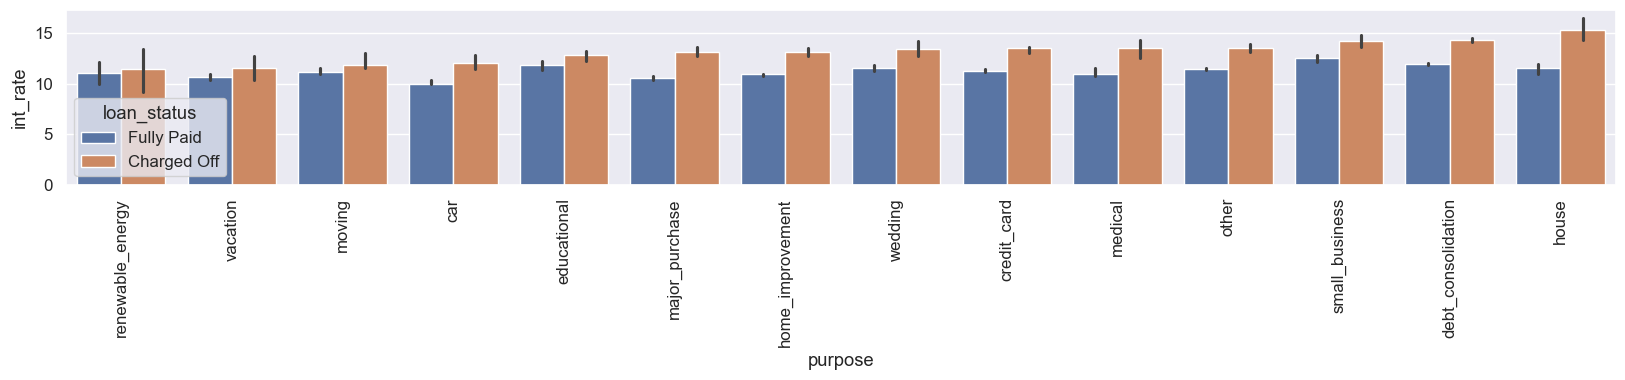

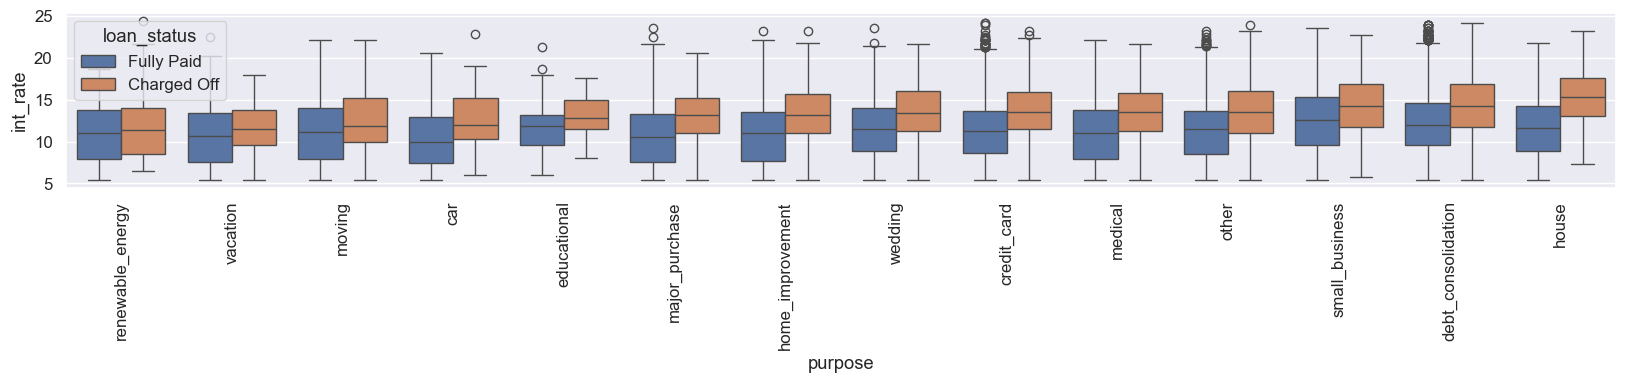

In [131]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= data, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**

Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

#### Bivariate Analysis - Employment Length

In [139]:
emplen_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid'] 
emplen_vs_loan['Chargedoff_Proportion'] = emplen_vs_loan['Charged Off'] / emplen_vs_loan['Total']
emplen_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,10+ years,1251,6661,7912,0.158114
7,7 years,250,1384,1634,0.152999
5,5 years,444,2623,3067,0.144767
8,8 years,196,1159,1355,0.144649
0,1 year,433,2562,2995,0.144574
10,< 1 year,596,3637,4233,0.140798
6,6 years,290,1772,2062,0.140640
3,3 years,534,3317,3851,0.138665
4,4 years,437,2765,3202,0.136477
2,2 years,542,3542,4084,0.132713


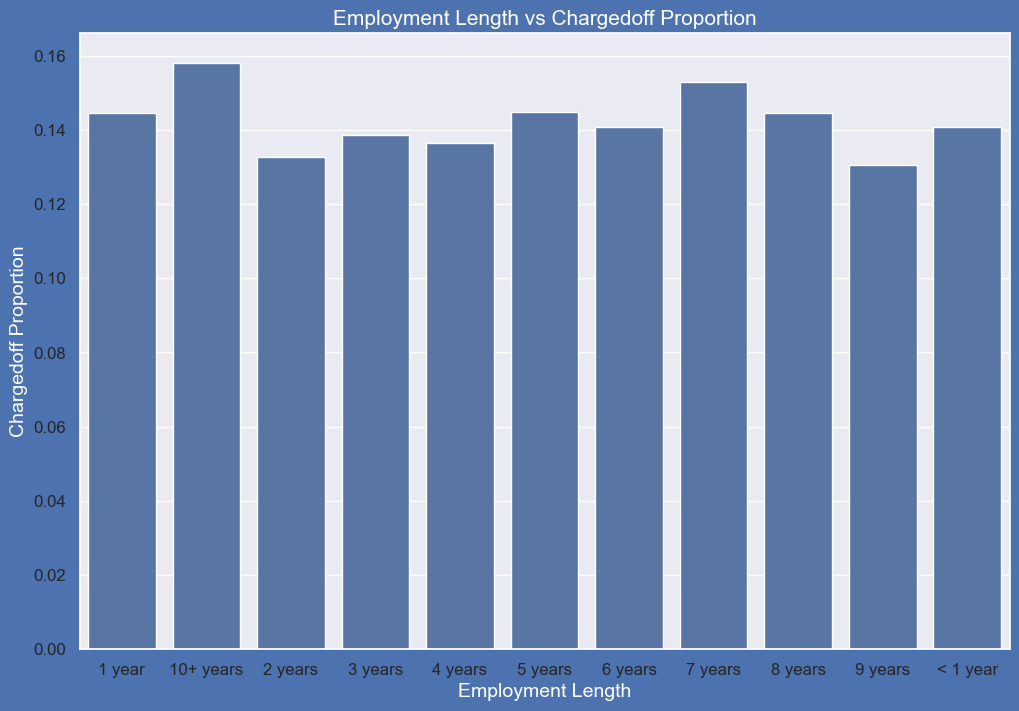

In [140]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=emplen_vs_loan)
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

**Observations:**

* Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
* It makes sense as with less or no experience they don't have source of income to repay loan.
* Rest of the applicants have more or less same chnaces of getting charged off.

## Bivariate Analysis - part 2

#####  Bivariate Analysis - Purpose of loan vs Loan amount


/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/3288329764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan,palette='rainbow')


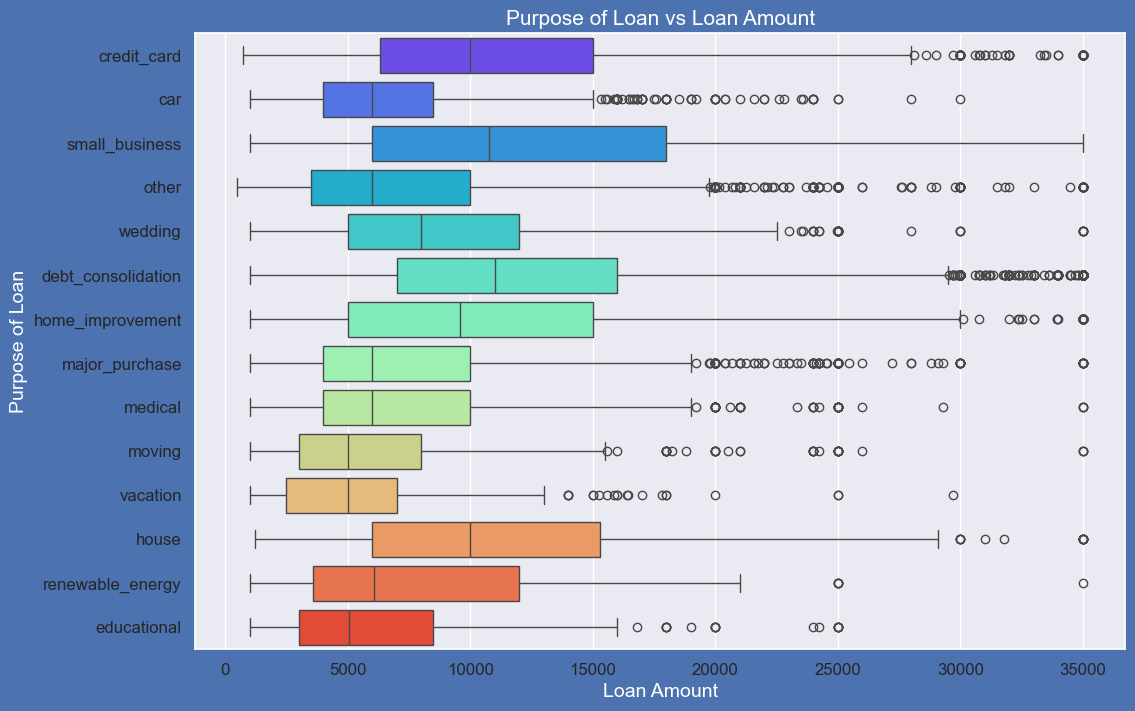

In [144]:
plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan,palette='rainbow')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

**Observations:**

* Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.
* Debt consolidation is second and Credit card comes 3rd.

#####  Bivariate Analysis -  Term of loan vs Interest Rate


/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/1324511363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y='int_rate', x='term', data =loan,palette='rainbow')


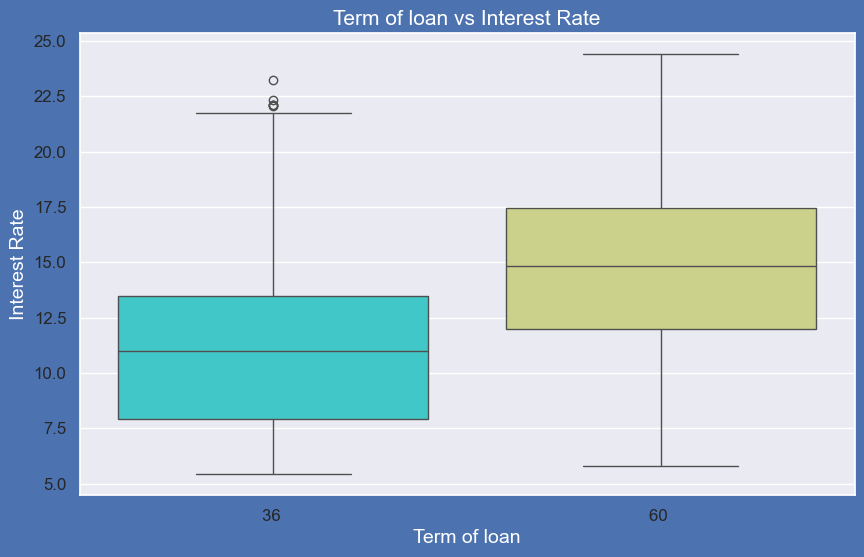

In [145]:
plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =loan,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

**Observations:**

* It is clear that avearge intrest rate is higher for 60 months loan term.
* Most of the loans issued for longer term had higher intrest rates for repayement.

#####  Bivariate Analysis -  Purpose vs Interest Rate


/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/924652169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')


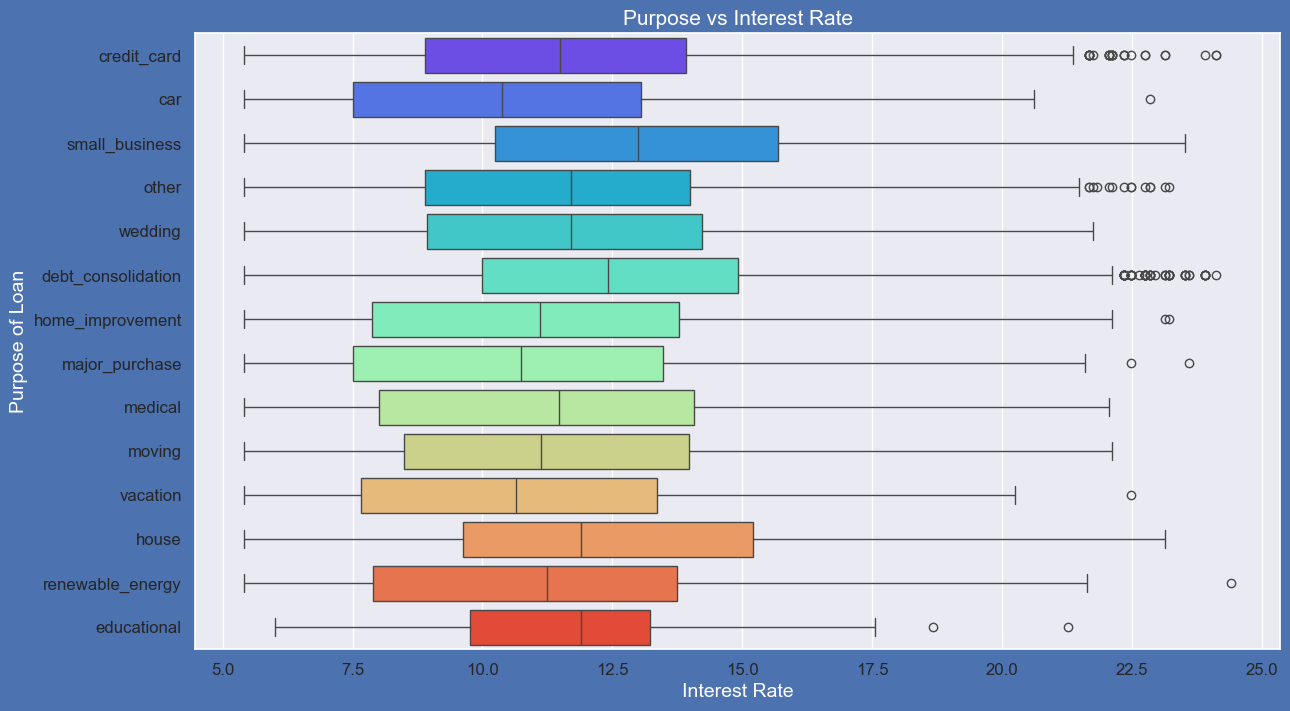

In [155]:
plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()


**Observations:**

* It is clear that avearge intrest rate is highest for small business purpose.
* Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
* Debt consolidation is 2nd where borrowers had to pay more interest rate.

#####  Bivariate Analysis -  year vs Interest Rate


/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/3638573608.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y='int_rate', x='issue_d_year', data =loan,palette='rainbow')


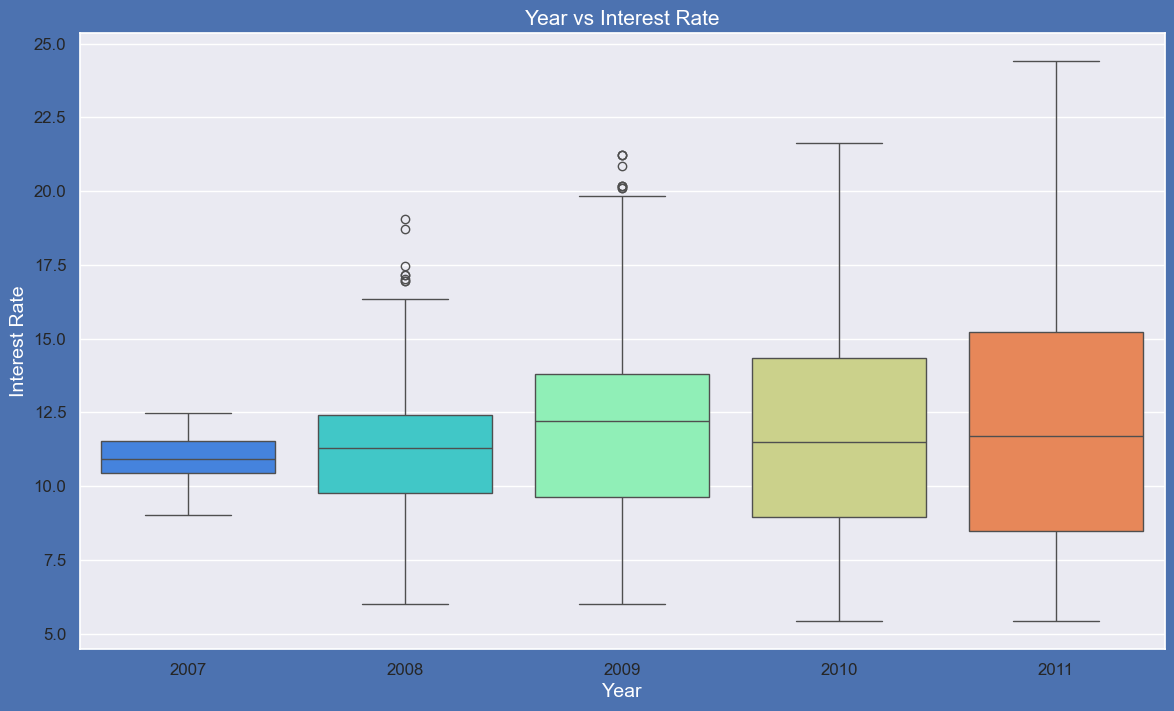

In [164]:
plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(y='int_rate', x='issue_d_year', data =loan,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

**Observations:**

Plot shows intrest rate is increasing slowly with increase in year.

### Correlation Matrix 

/var/folders/qt/_8p209wn2lz22f98jxh20tr80000gr/T/ipykernel_51066/2020521138.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


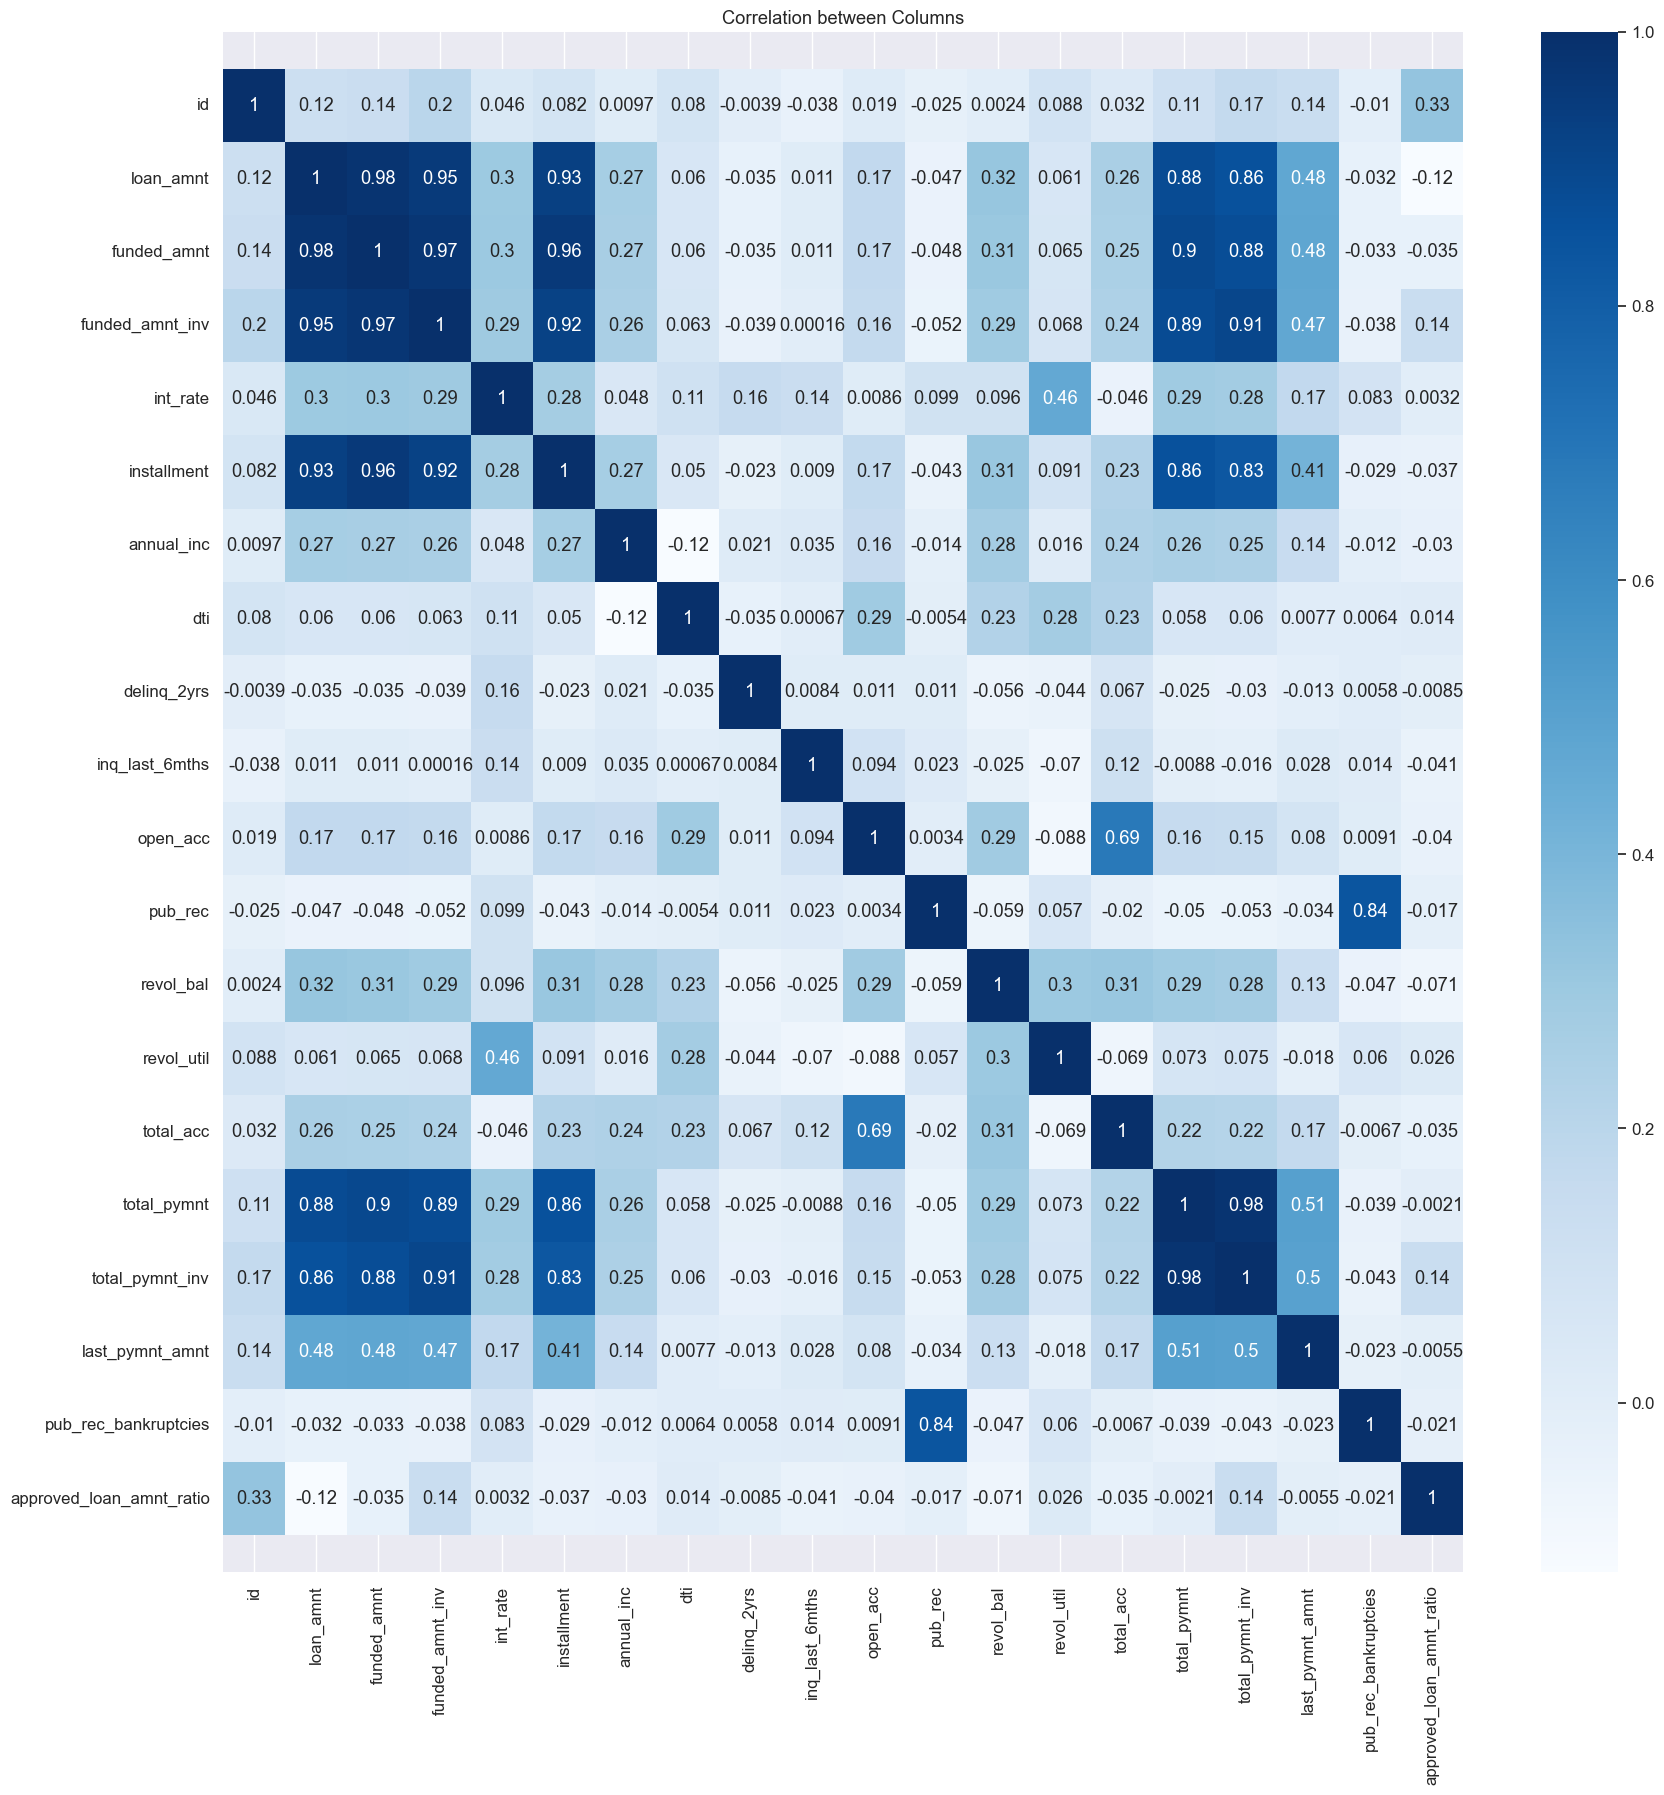

In [ ]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

#Finding correlation matric
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()



**Observations:**

1. Observation is that Loan amount, investor amount, funding amount are strongly correlated.
2. Annual income with DTI(Debt-to-income ratio) is negatively correalted. Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
4. That means when annual income is low DTI is high & vice versa.
5. positive correlation between annual income and employment years.


In [ ]:
#OBSERVATION SUMMARY:

# DATA CLEANING

-	TOTAL ROWS X COLUMNS = (39717, 111).
-	Removed all the columns with Null values > 30%.
-	Dropped the columns with only one values.
-	Removing outliers.
-	Creatind Categorical derived column in the form of Bins.


#DATA ANALYSIS

-	Univariate Analysis:

1.	Funded amount analysis shows lending club has approved most of the loans.    
2.	Most of the interest rates are in between 10-15% and few has rates > 22.5%.
3.	Most of the borrower's Annual incomes are in range of 40000- 80000.

-	Unordered Category List:

1.	Close to 14% loans were charged off out of total loan issued.
2.	99% people has gone bankrupt.
3.	The loan borrowers are having mostly borrowed/rented house.
4.	Majority of loans were given without verification of applicants income.


-	Ordered Categorical List:

1.	The lending club(LC) has doubling loan issues every year.
2.	Borrowers are mostly 10+ years emploment length.

-	Segmented Univariate Analysis:

1.	Higher amount loans have high tenure i.e, 60 months.
2.	Charged Off loans have higher amounts than Fully Paid ones.
3.	Greater the interest rate more is the chance of the borrower Defaulting the loan.
4.	A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

-	Bivariate Analysis:
1.	For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.
2.	Small Business has more defaults when the loan amount is also high.
3.	Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

-	Correlation Matrix:

1.	Observation is that Loan amount, investor amount, funding amount are strongly correlated.
2.	Annual income with DTI(Debt-to-income ratio) is negatively correalted. Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts.
3.	That means when annual income is low DTI is high & vice versa.
4.	positive correlation between annual income and employment years.





